# <span style="color:green"> EDA, FE and Classification Model (Wine Quality Dataset) </span>

# <span style="color:blue"> 1. EDA and FE </span>

1.Data Profiling

2.Stastical analysis

3.Graphical Analysis

4.Data Cleaning

5.Data Scaling

# <span style="color:blue">2. Decision Tree Classifier Model </span>

1.Decision Tree Classifier Model

2.Performance metrics for above model

3.Decision Tree Visualization

4.Hyper-Parameter Tuning for above model

# <span style="color:blue">3. Logistic Regression Model </span>

1.Linear Regression Model

2.Performance metrics for above model

3.Hyper-Parameter Tuning for above model

# <span style="color:blue">4. Support Vector Classifier Model </span>

1.Support Vector Classifier Model

2.Performance metrics for above model

3.Hyper-Parameter Tuning for above model

# <span style="color:blue">5. Random Forest Classifier Model </span>

1.Random Forest Classifier Model

2.Performance metrics for above model

3.Hyper-Parameter Tuning for above model

Dataset: https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv

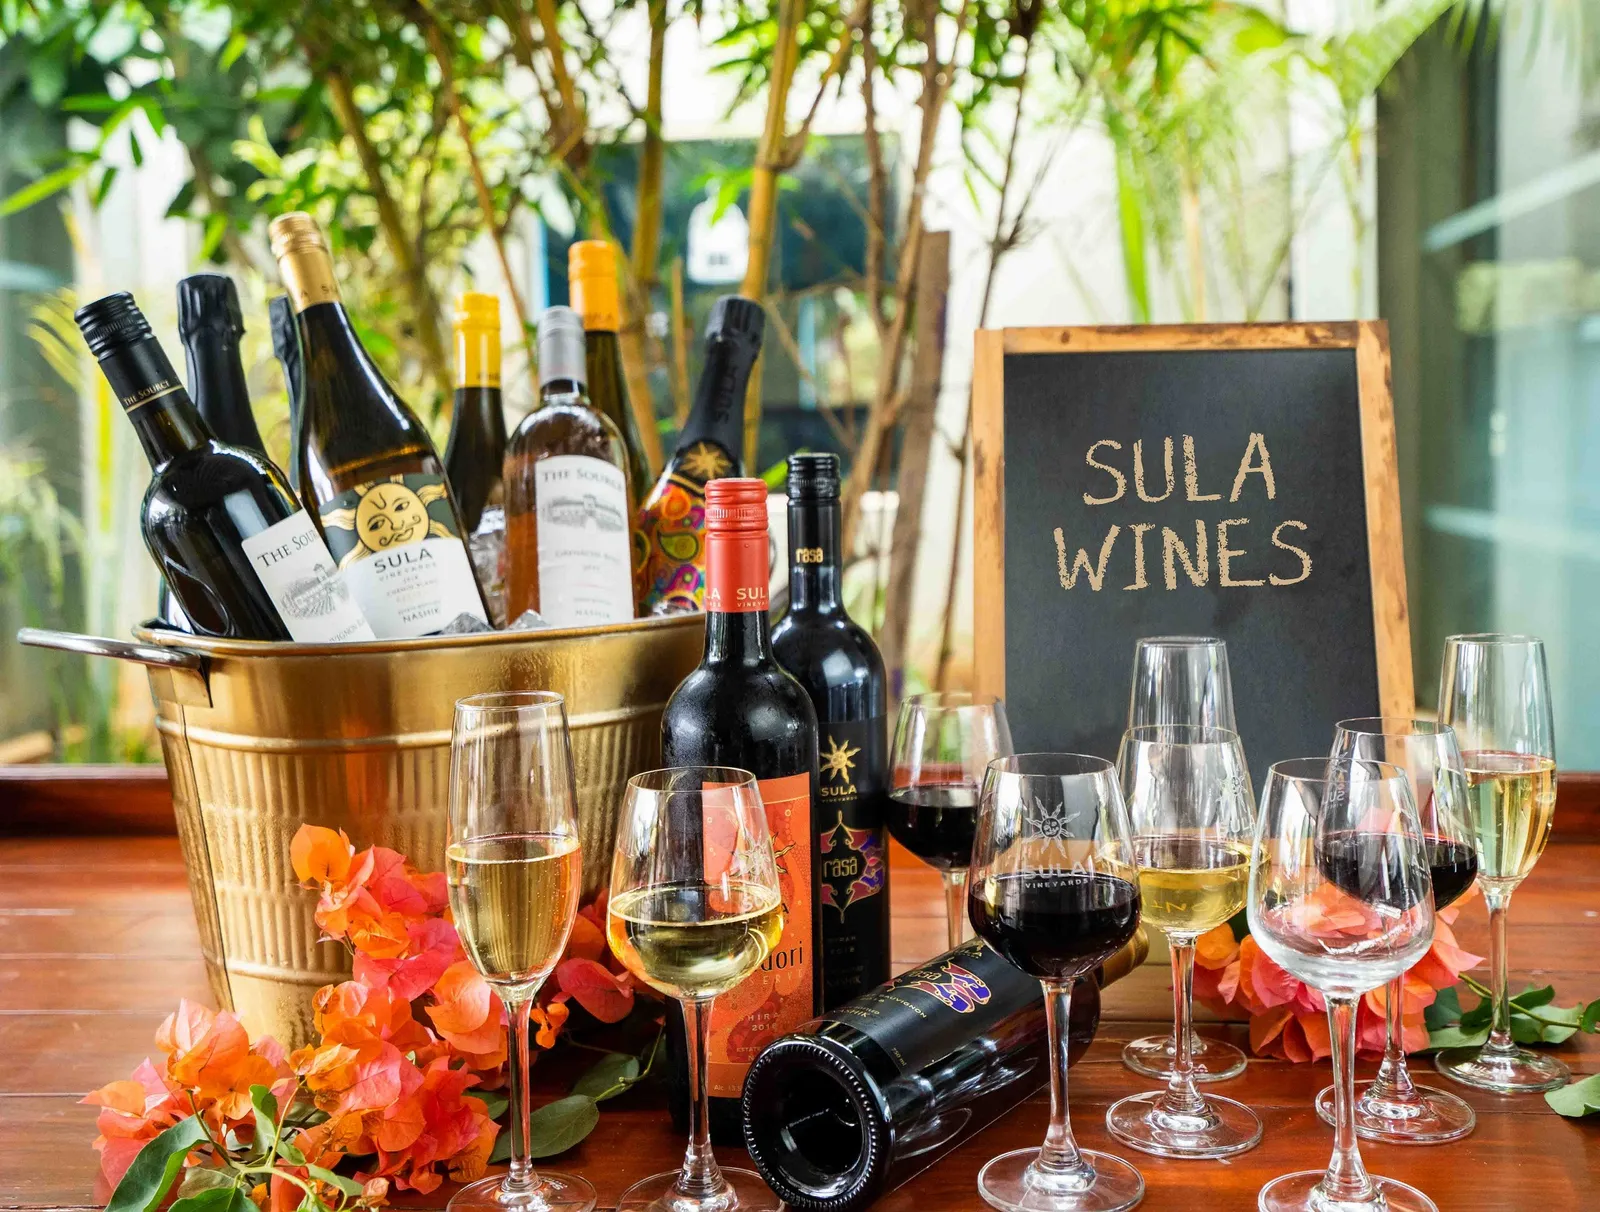

In [2]:
from IPython import display
display.Image("desktop/image.png")

# <span style="color:green"> 1.0 Importing required libraries </span>

In [366]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##for Q-Q plot # A Q-Q plot, short for “quantile-quantile” plot, is often used to assess whether or not a set of data potentially came from some theoretical distribution. In most cases, this type of plot is used to determine whether or not a set of data follows a normal distribution.
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV #GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.
from sklearn.preprocessing import  StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

### To be able to see maximum columns on screen
pd.set_option("display.max_columns",500)


# <span style="color:green"> 2.0 Importing dataset and performing descriptive analysis </span>

In [198]:
data=pd.read_csv("desktop/Datasets/winequality-red.csv",sep=";")
data.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [199]:
### getting unique values for quality feature
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [200]:
data.shape

(1599, 12)

In [201]:
### getting count of record for each unique value in quality
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [202]:
# getting null values and datatypes of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [203]:
### checking duplicate values
data.duplicated().sum()

240

In [204]:
### dropping duplicate values
data.drop_duplicates(inplace=True)

In [205]:
### checking duplicate values
data.duplicated().sum()

0

In [206]:
### checking different value counts
data["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [207]:
## getting info about numerical features
data.describe().T

count       mean        std      min      25%      50%  \
fixed acidity         1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
volatile acidity      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
citric acid           1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
residual sugar        1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
chlorides             1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
free sulfur dioxide   1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
total sulfur dioxide  1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
density               1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
pH                    1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
sulphates             1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
alcohol               1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
quality               1359.0   5.623252   0.823578  3.00000   5.0000   6.0000   

                           75%        max  
fixed acidity          9.20000   15.90000  
volatile acidity       0.64000    1.58000  
citric acid            0.43000    1.00000  
residual sugar         2.60000   15.50000  
chlorides              0.09100    0.61100  
free sulfur dioxide   21.00000   72.00000  
total sulfur dioxide  63.00000  289.00000  
density                0.99782    1.00369  
pH                     3.40000    4.01000  
sulphates              0.73000    2.00000  
alcohol               11.10000   14.90000  
quality                6.00000    8.00000

In [208]:
### getting null values in each feature

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [209]:
### getting correlation between independent and dependent features 
corr=round(data.corr(),2)
corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.26         0.67   
volatile acidity              -0.26              1.00        -0.55   
citric acid                    0.67             -0.55         1.00   
residual sugar                 0.11             -0.00         0.14   
chlorides                      0.09              0.06         0.21   
free sulfur dioxide           -0.14             -0.02        -0.05   
total sulfur dioxide          -0.10              0.07         0.05   
density                        0.67              0.02         0.36   
pH                            -0.69              0.25        -0.55   
sulphates                      0.19             -0.26         0.33   
alcohol                       -0.06             -0.20         0.11   
quality                        0.12             -0.40         0.23   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                   0.11       0.09                -0.14   
volatile acidity               -0.00       0.06                -0.02   
citric acid                     0.14       0.21                -0.05   
residual sugar                  1.00       0.03                 0.16   
chlorides                       0.03       1.00                 0.00   
free sulfur dioxide             0.16       0.00                 1.00   
total sulfur dioxide            0.20       0.05                 0.67   
density                         0.32       0.19                -0.02   
pH                             -0.08      -0.27                 0.06   
sulphates                      -0.01       0.39                 0.05   
alcohol                         0.06      -0.22                -0.08   
quality                         0.01      -0.13                -0.05   

                      total sulfur dioxide  density    pH  sulphates  alcohol  \
fixed acidity                        -0.10     0.67 -0.69       0.19    -0.06   
volatile acidity                      0.07     0.02  0.25      -0.26    -0.20   
citric acid                           0.05     0.36 -0.55       0.33     0.11   
residual sugar                        0.20     0.32 -0.08      -0.01     0.06   
chlorides                             0.05     0.19 -0.27       0.39    -0.22   
free sulfur dioxide                   0.67    -0.02  0.06       0.05    -0.08   
total sulfur dioxide                  1.00     0.08 -0.08       0.04    -0.22   
density                               0.08     1.00 -0.36       0.15    -0.50   
pH                                   -0.08    -0.36  1.00      -0.21     0.21   
sulphates                             0.04     0.15 -0.21       1.00     0.09   
alcohol                              -0.22    -0.50  0.21       0.09     1.00   
quality                              -0.18    -0.18 -0.06       0.25     0.48   

                      quality  
fixed acidity            0.12  
volatile acidity        -0.40  
citric acid              0.23  
residual sugar           0.01  
chlorides               -0.13  
free sulfur dioxide     -0.05  
total sulfur dioxide    -0.18  
density                 -0.18  
pH                      -0.06  
sulphates                0.25  
alcohol                  0.48  
quality                  1.00

# <span style="color:green"> 3.0 Getting continuous and discrete features </span>

In [210]:
### getting list of numerical features 
Numerical_features=data.columns
print(Numerical_features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [211]:
### getting count of unique value in each feature
for feature in Numerical_features:
    print(" '{}' has'{}'no. of unique values".format(feature,data[feature].nunique()))

 'fixed acidity' has'96'no. of unique values
 'volatile acidity' has'143'no. of unique values
 'citric acid' has'80'no. of unique values
 'residual sugar' has'91'no. of unique values
 'chlorides' has'153'no. of unique values
 'free sulfur dioxide' has'60'no. of unique values
 'total sulfur dioxide' has'144'no. of unique values
 'density' has'436'no. of unique values
 'pH' has'89'no. of unique values
 'sulphates' has'96'no. of unique values
 'alcohol' has'65'no. of unique values
 'quality' has'6'no. of unique values


<AxesSubplot:xlabel='quality', ylabel='count'>

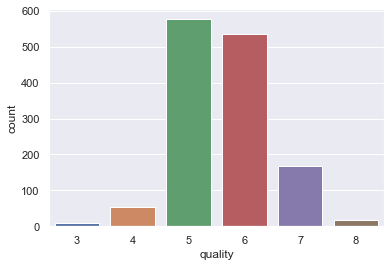

In [212]:
### visualising count of quality which is discrete feature
sns.countplot(data=data, x="quality")

In [213]:
### Getting list of continuous features as only discrete feature is quality
Continuous_Features= [feature for feature in Numerical_features if data[feature].nunique()>6]
print(Continuous_Features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


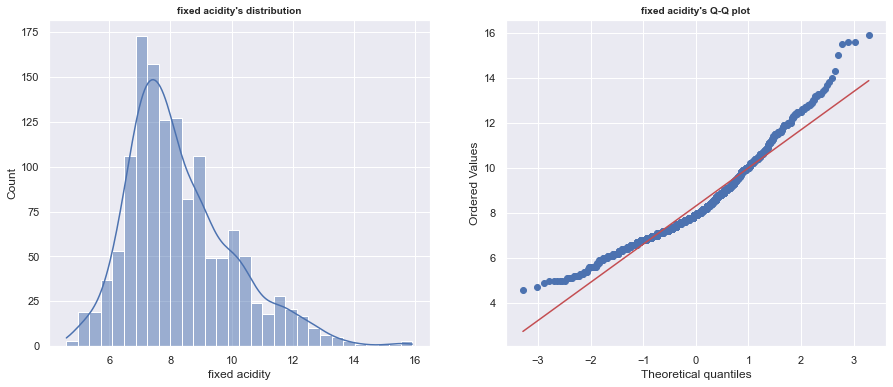

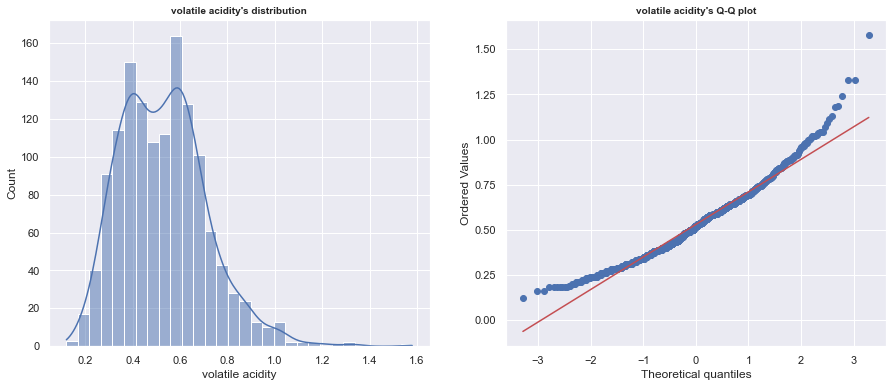

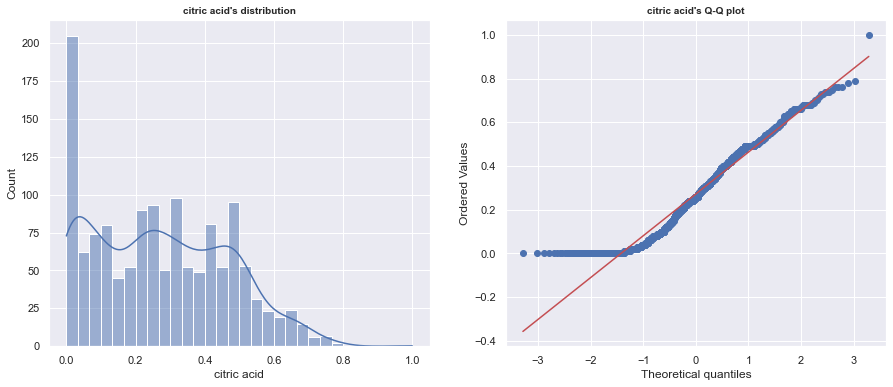

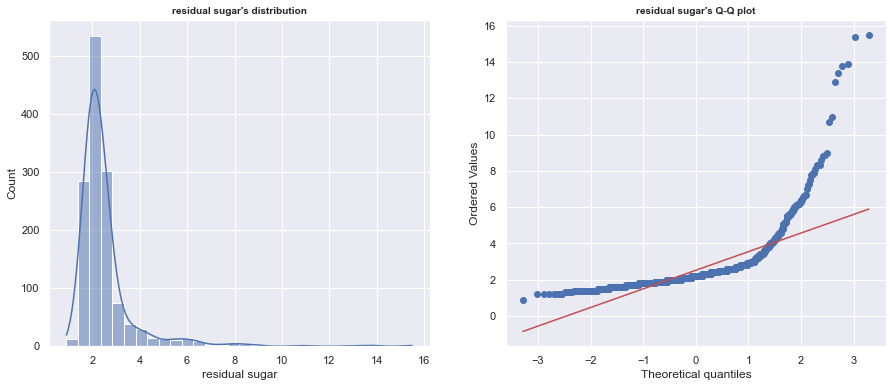

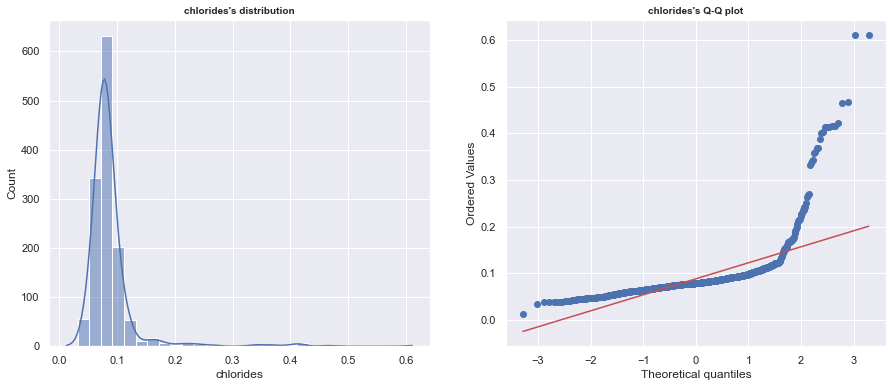

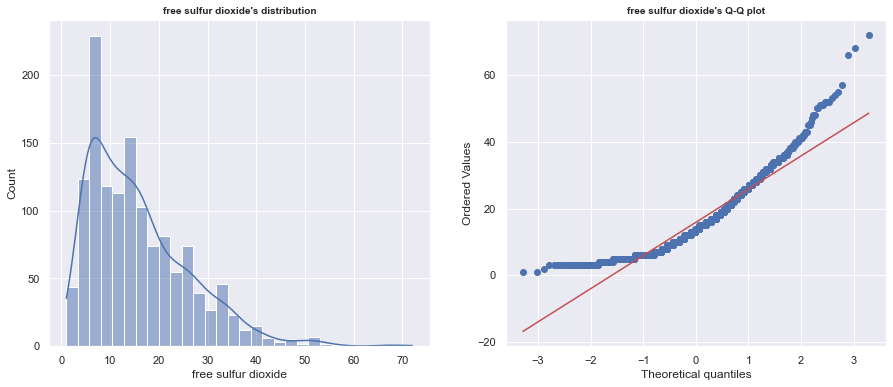

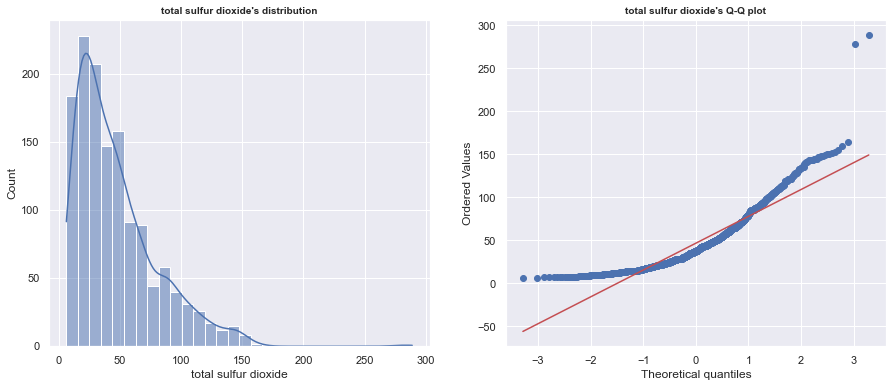

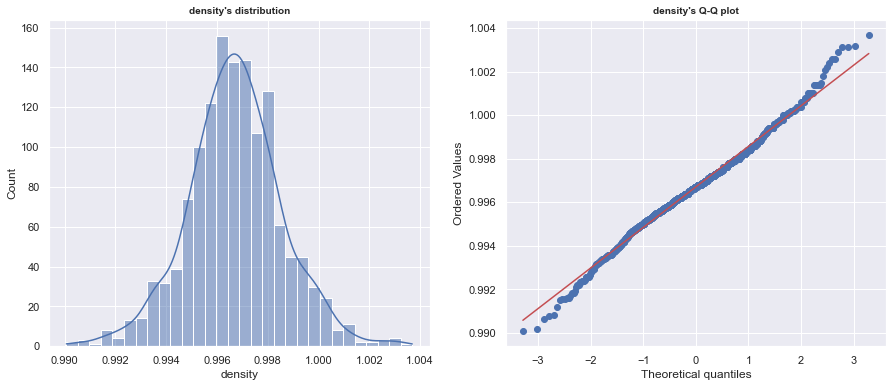

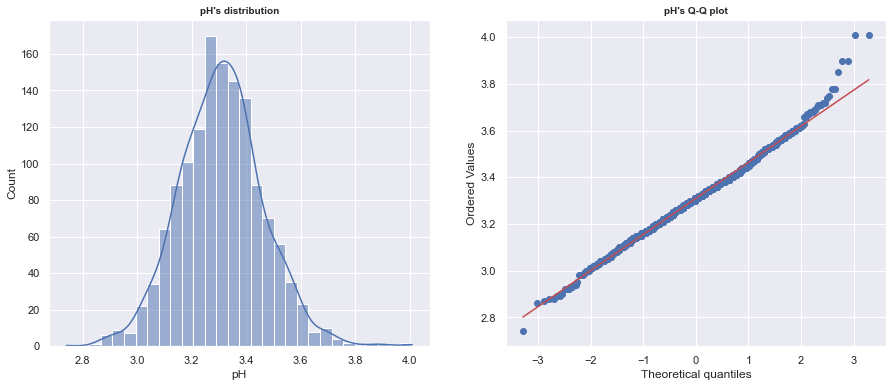

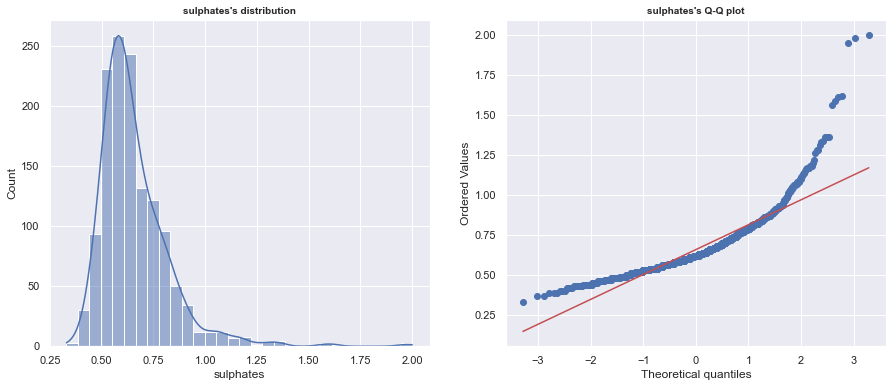

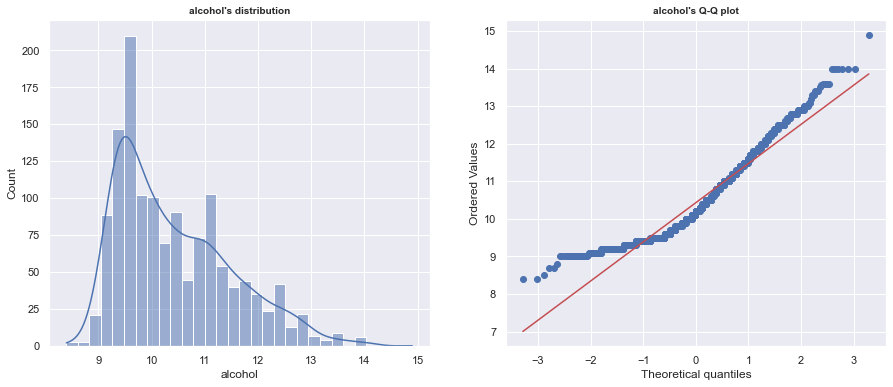

In [214]:
### Checking distribution of Continuous numerical features
for feature in Continuous_Features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=data,x=feature,kde=True,bins=30)
    plt.title("{}'s distribution".format(feature), fontsize=10,fontweight="bold")
    
    plt.subplot(122)
    stats.probplot(data[feature],dist="norm",plot=plt)
    plt.title("{}'s Q-Q plot".format(feature), fontsize=10,fontweight="bold")
    plt.show();    

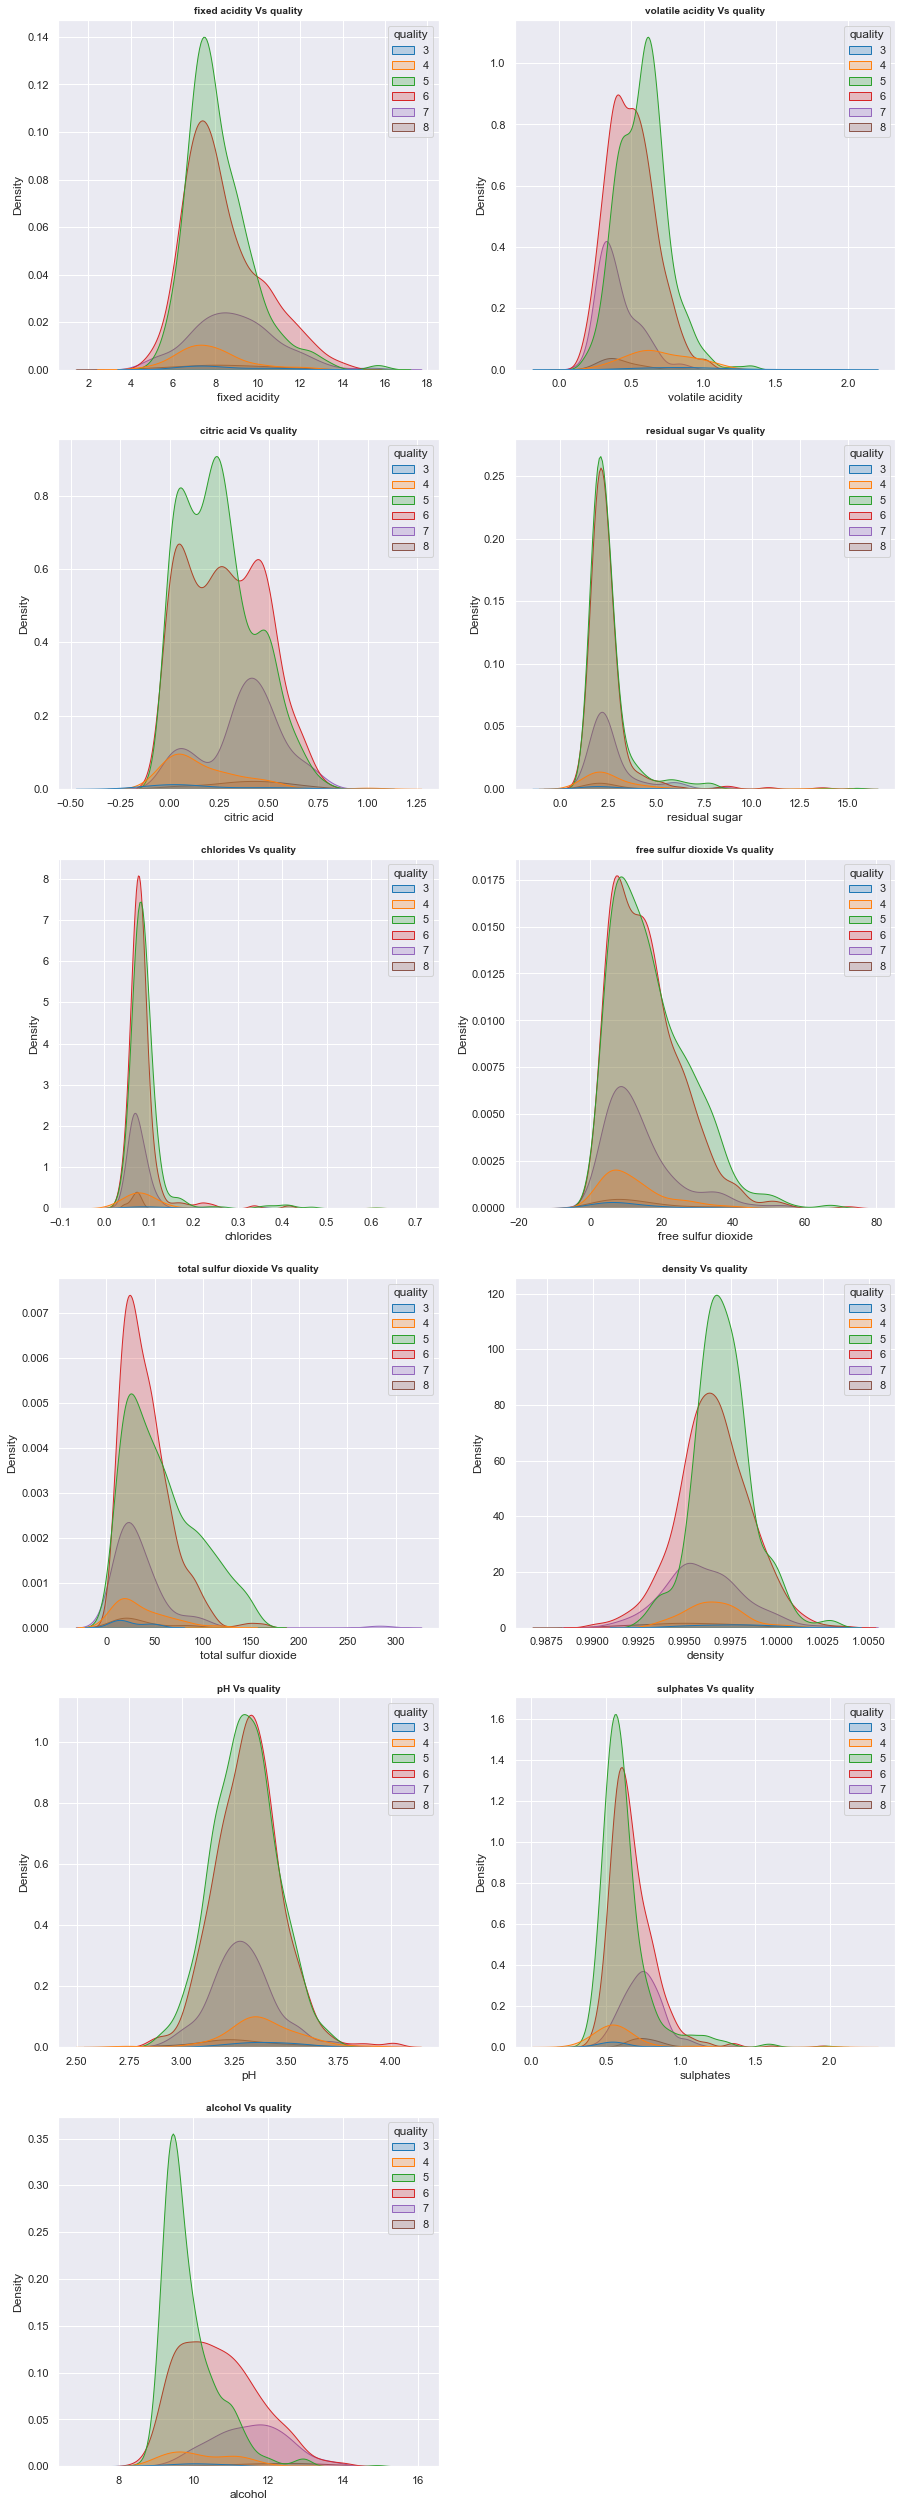

In [215]:
### Comparing Continuous numerical features with quality feature
palette1=sns.color_palette("tab10",6)
plt.figure(figsize=(15,45))
for feature in enumerate(Continuous_Features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={"figure.figsize":(7,7)})
    sns.kdeplot(data=data,x=feature[1],hue="quality",palette=palette1,fill=True)
    plt.title("{} Vs quality".format(feature[1]),fontsize=10,fontweight="bold")

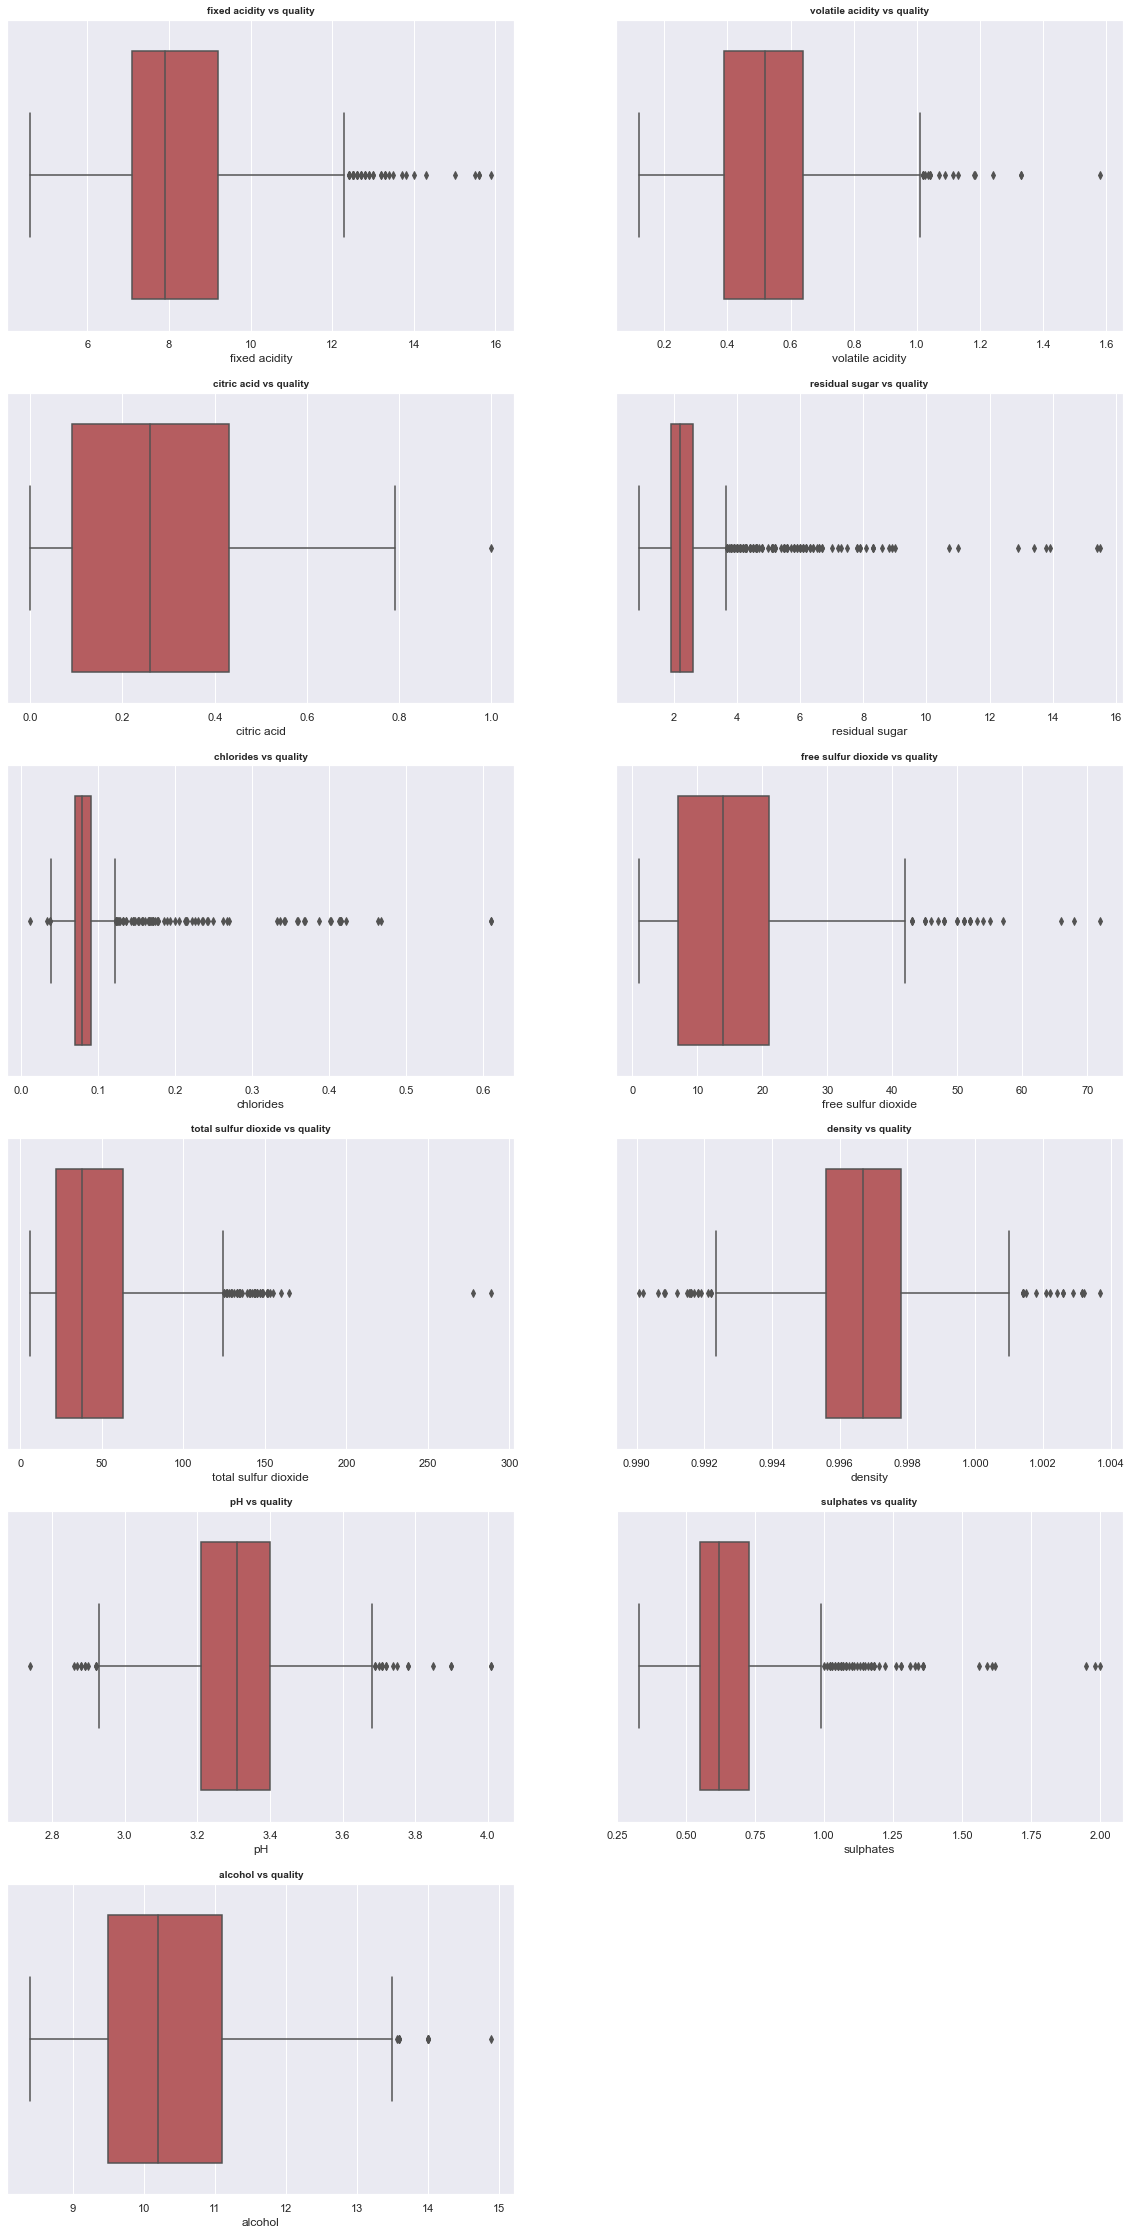

In [216]:
### Checking outliers in numerical features
plt.figure(figsize=(20,40))
for feature in enumerate(Continuous_Features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={"figure.figsize":(10,6)})
    sns.boxplot(data=data,x=feature[1],color="r")
    plt.title("{} vs quality" .format(feature[1]),fontsize=10,fontweight="bold")
    
    

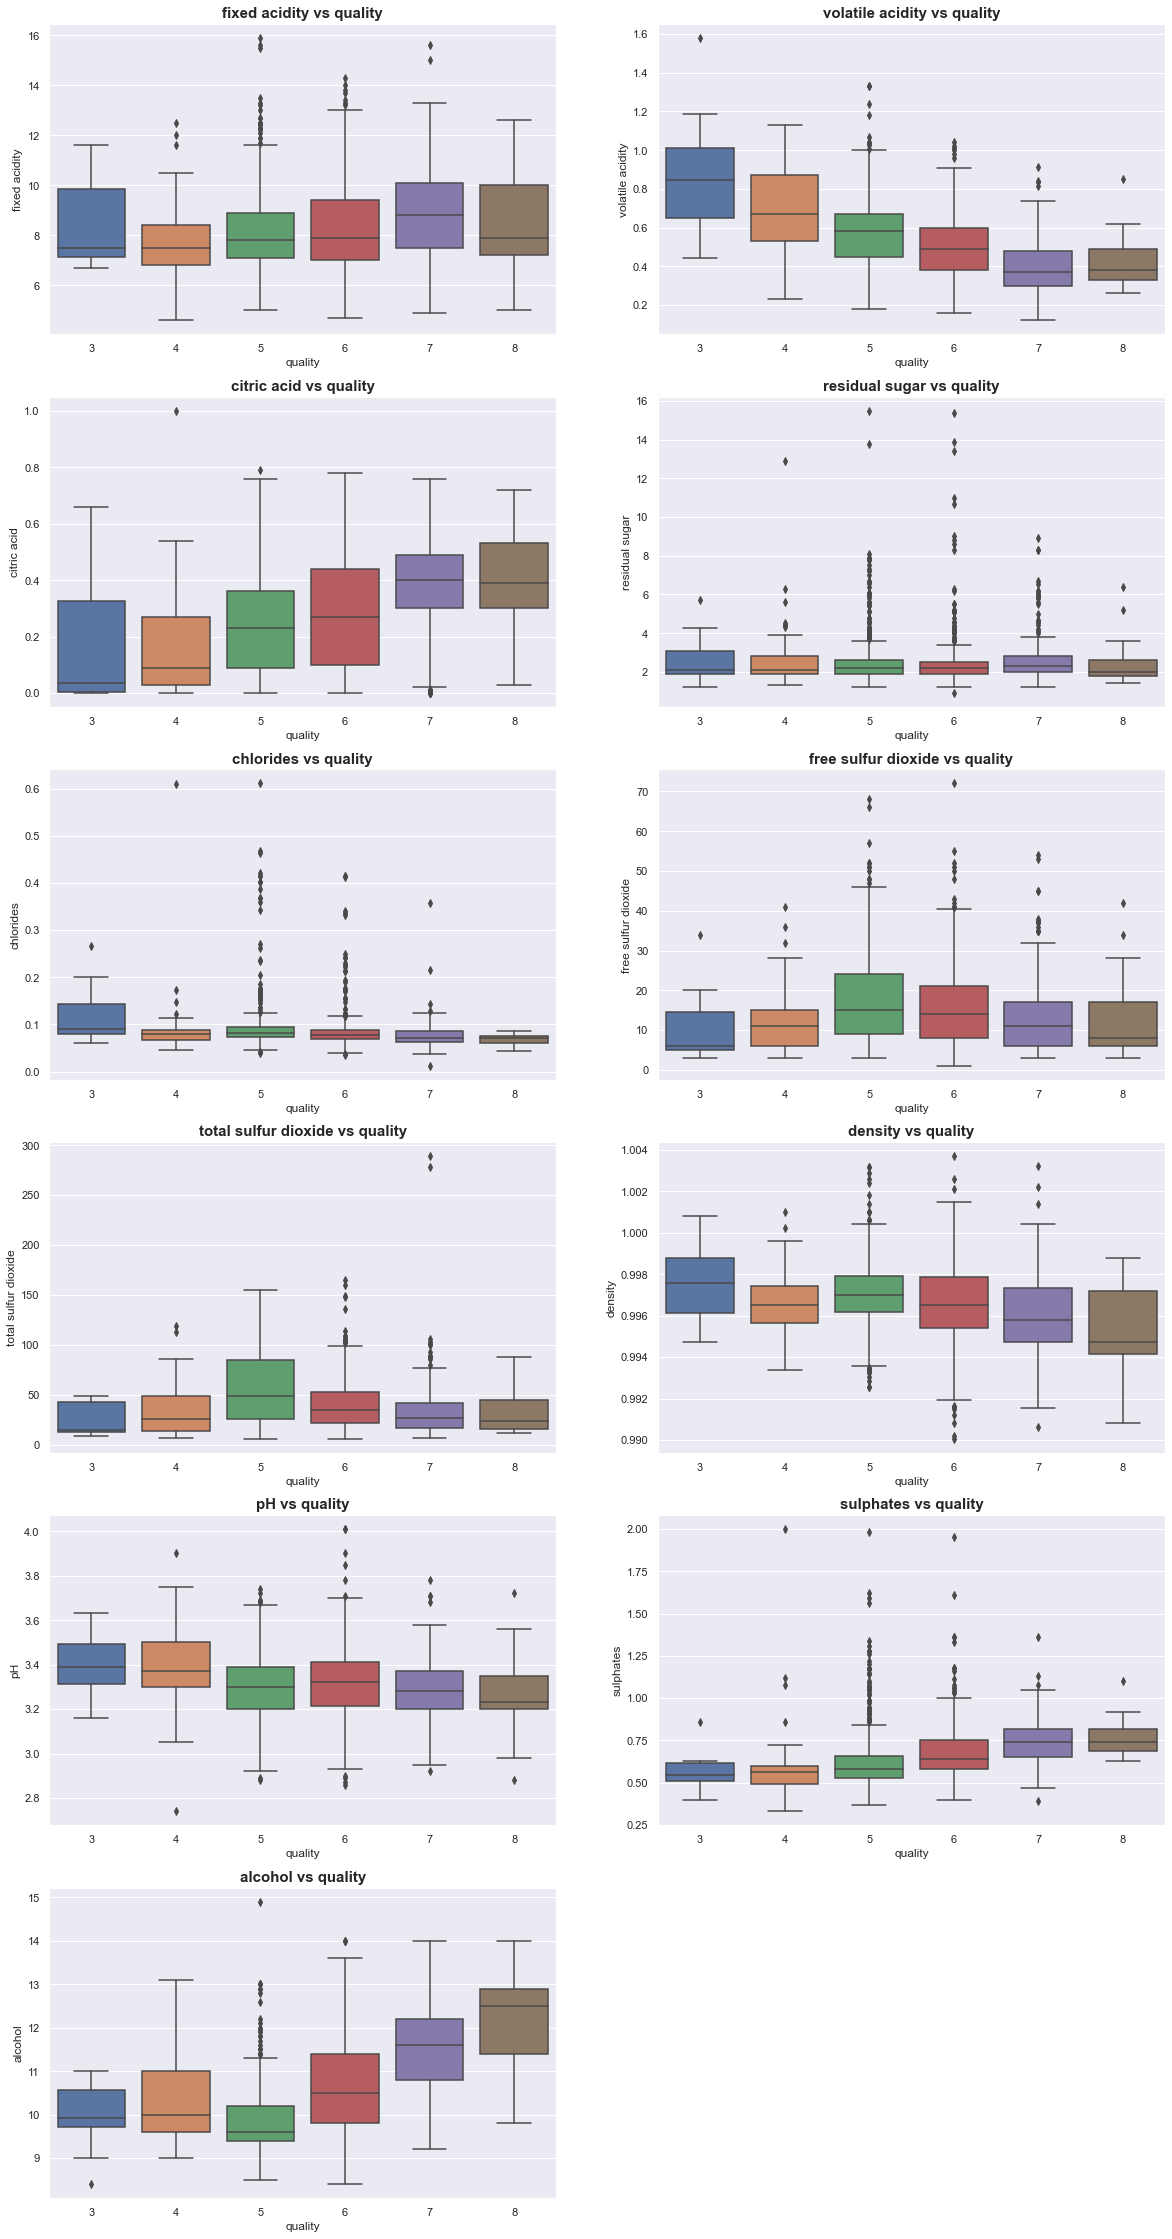

In [217]:
### getting outliers in features for each unique value in quality feature

plt.figure(figsize=(20,40))
for feature in enumerate(Continuous_Features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={"figure.figsize":(10,6)})
    sns.boxplot(data=data,y=feature[1],x="quality")
    plt.title("{} vs quality".format(feature[1]),fontsize=15,fontweight="bold")
plt.show();

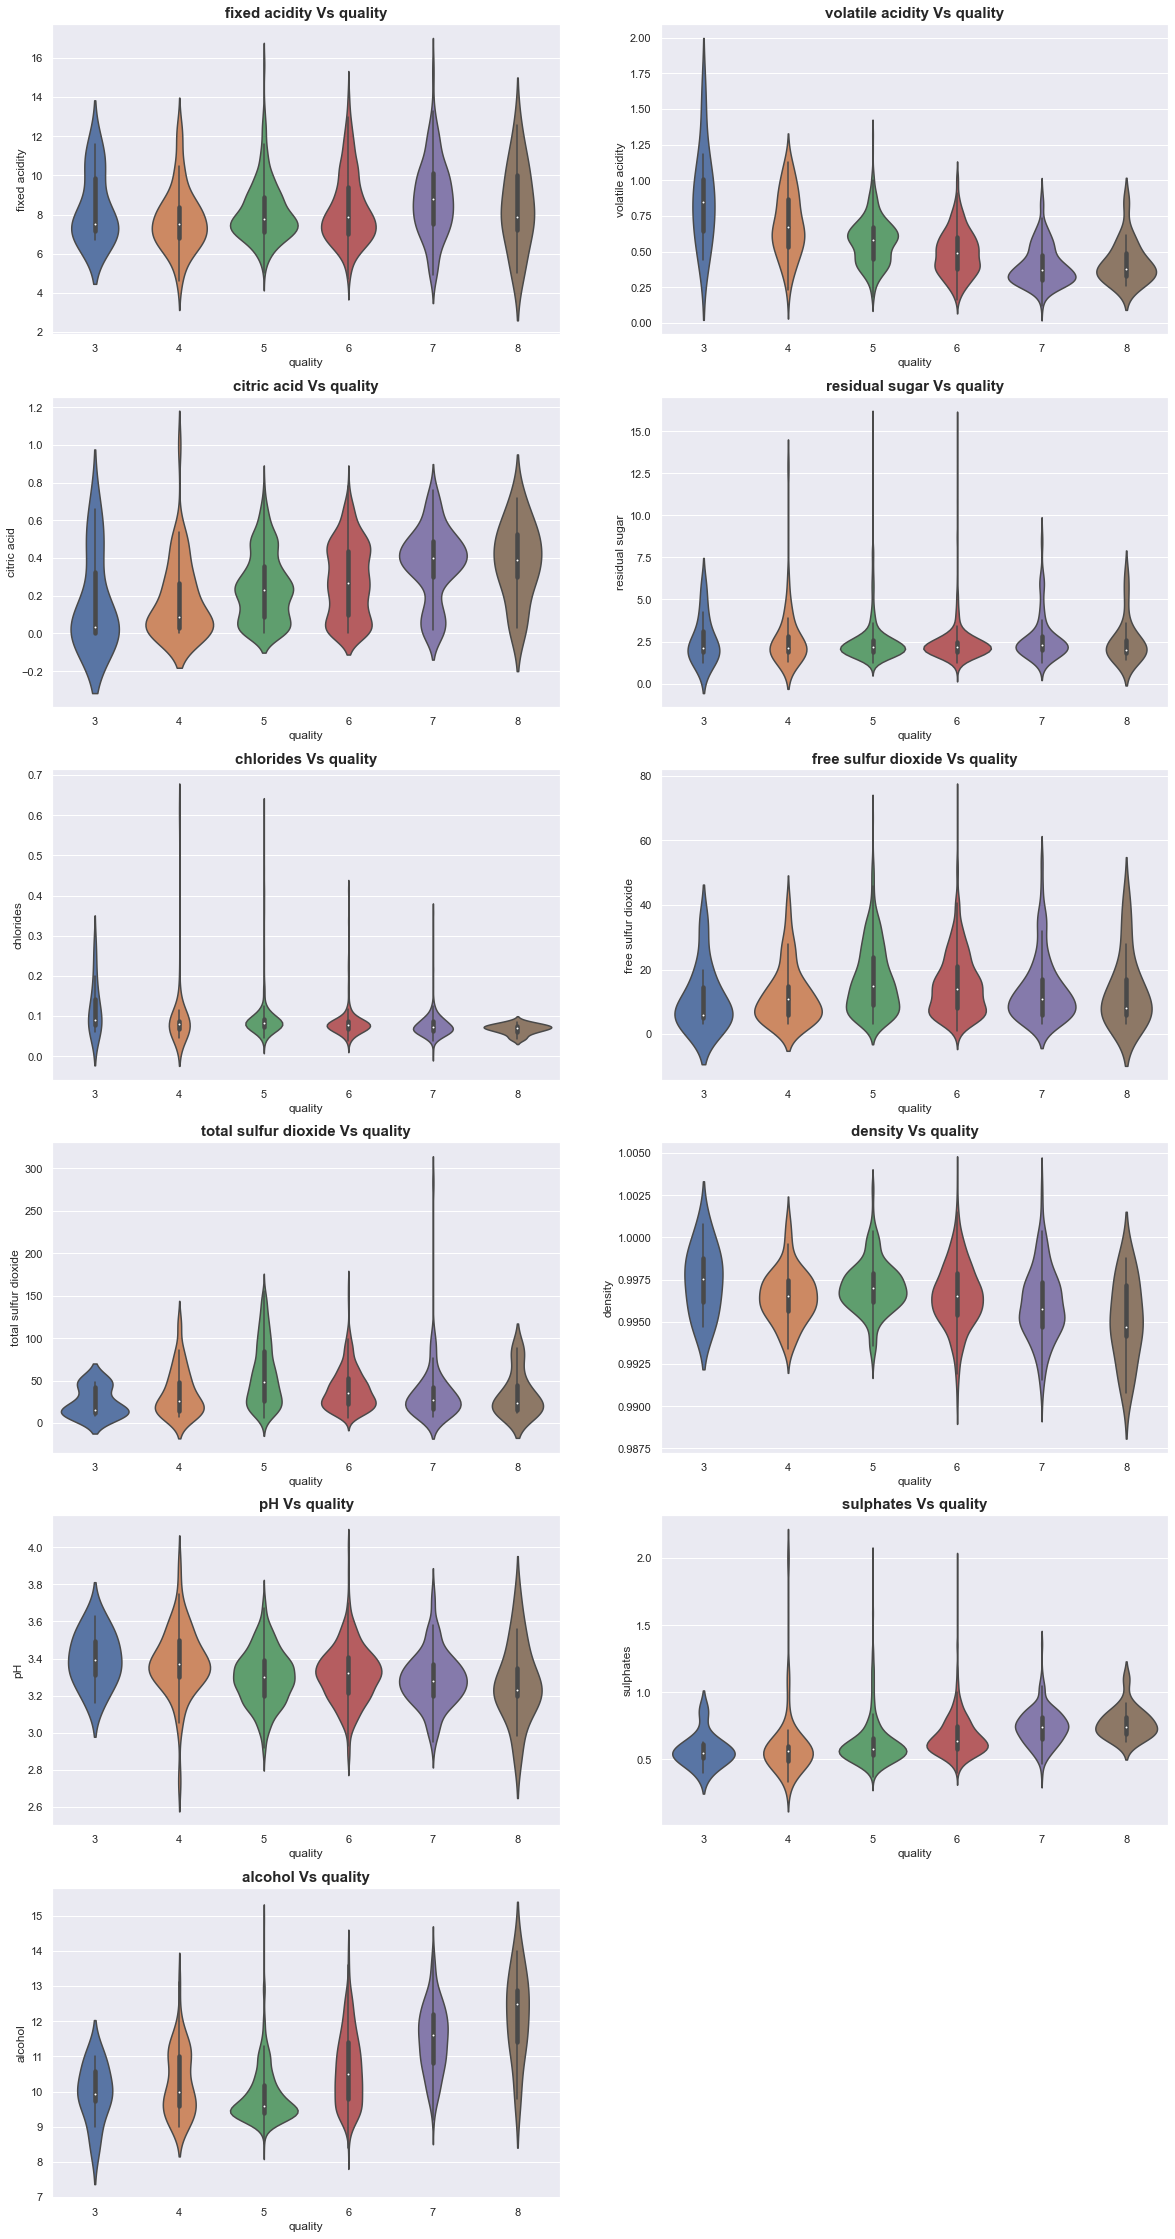

In [218]:
### visualising data scatter in each continuous feature with respect to quality

plt.figure(figsize=(20,40))
for feature in enumerate(Continuous_Features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={"figure.figsize":(10,6)})
    sns.violinplot(data=data,x="quality",y=feature[1])
    plt.title("{} Vs quality" .format(feature[1]),fontweight="bold",fontsize=15)
    

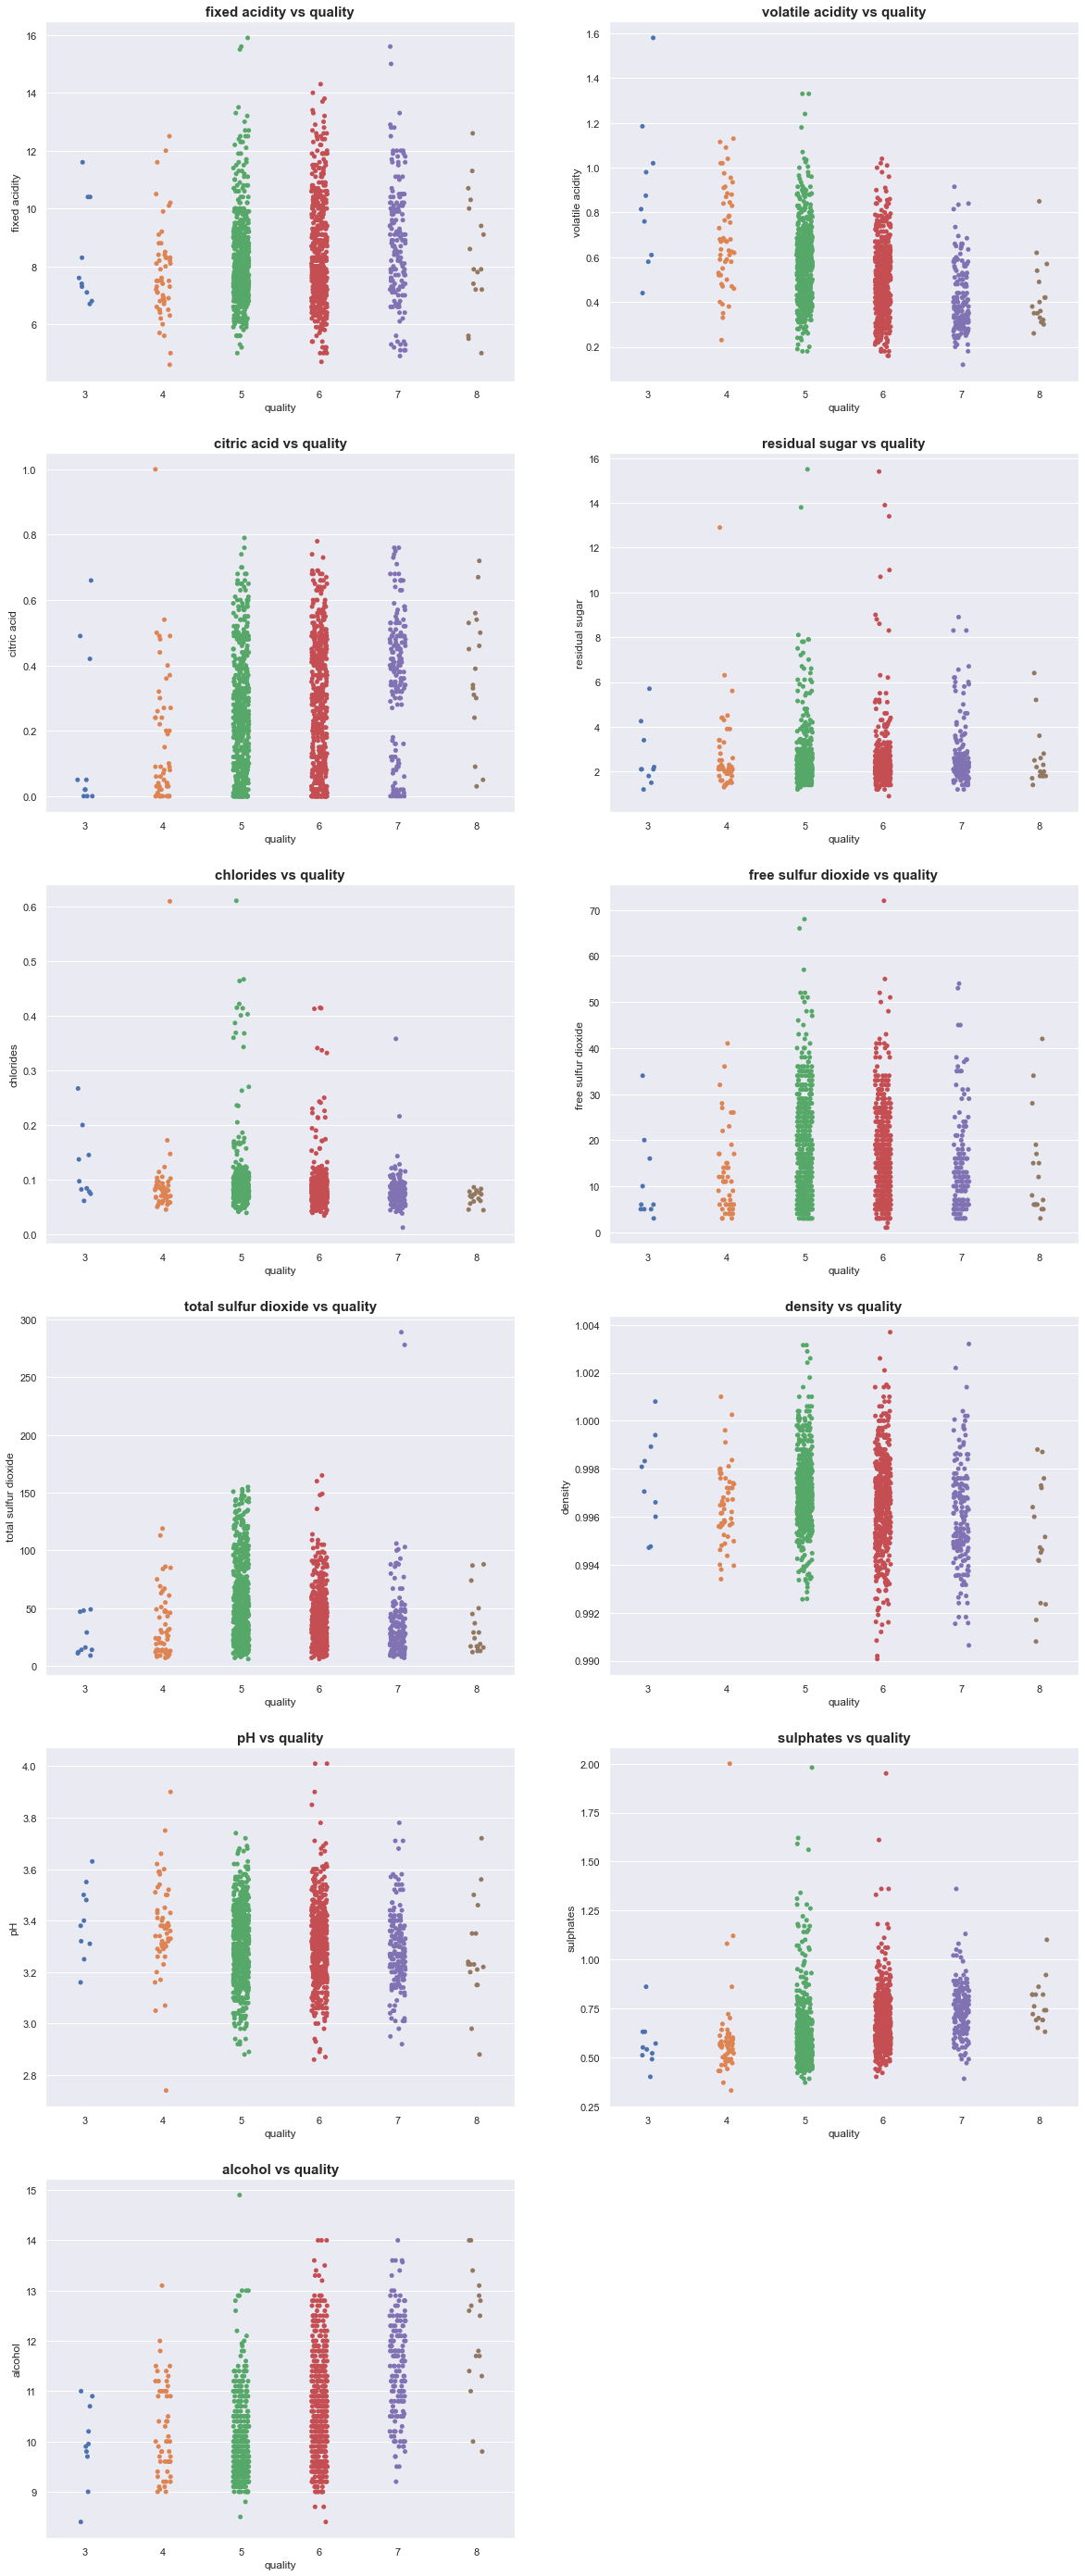

In [220]:
### visualising data scatter in each continuous feature with respect to quality

plt.figure(figsize=(20,50))
for feature in enumerate (Continuous_Features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={"figure.figsize":(7,6)})
    sns.stripplot(data=data,x="quality",y=feature[1],jitter= 1)
    plt.title("{} vs quality".format(feature[1]),fontweight="bold",fontsize=15)
plt.show();

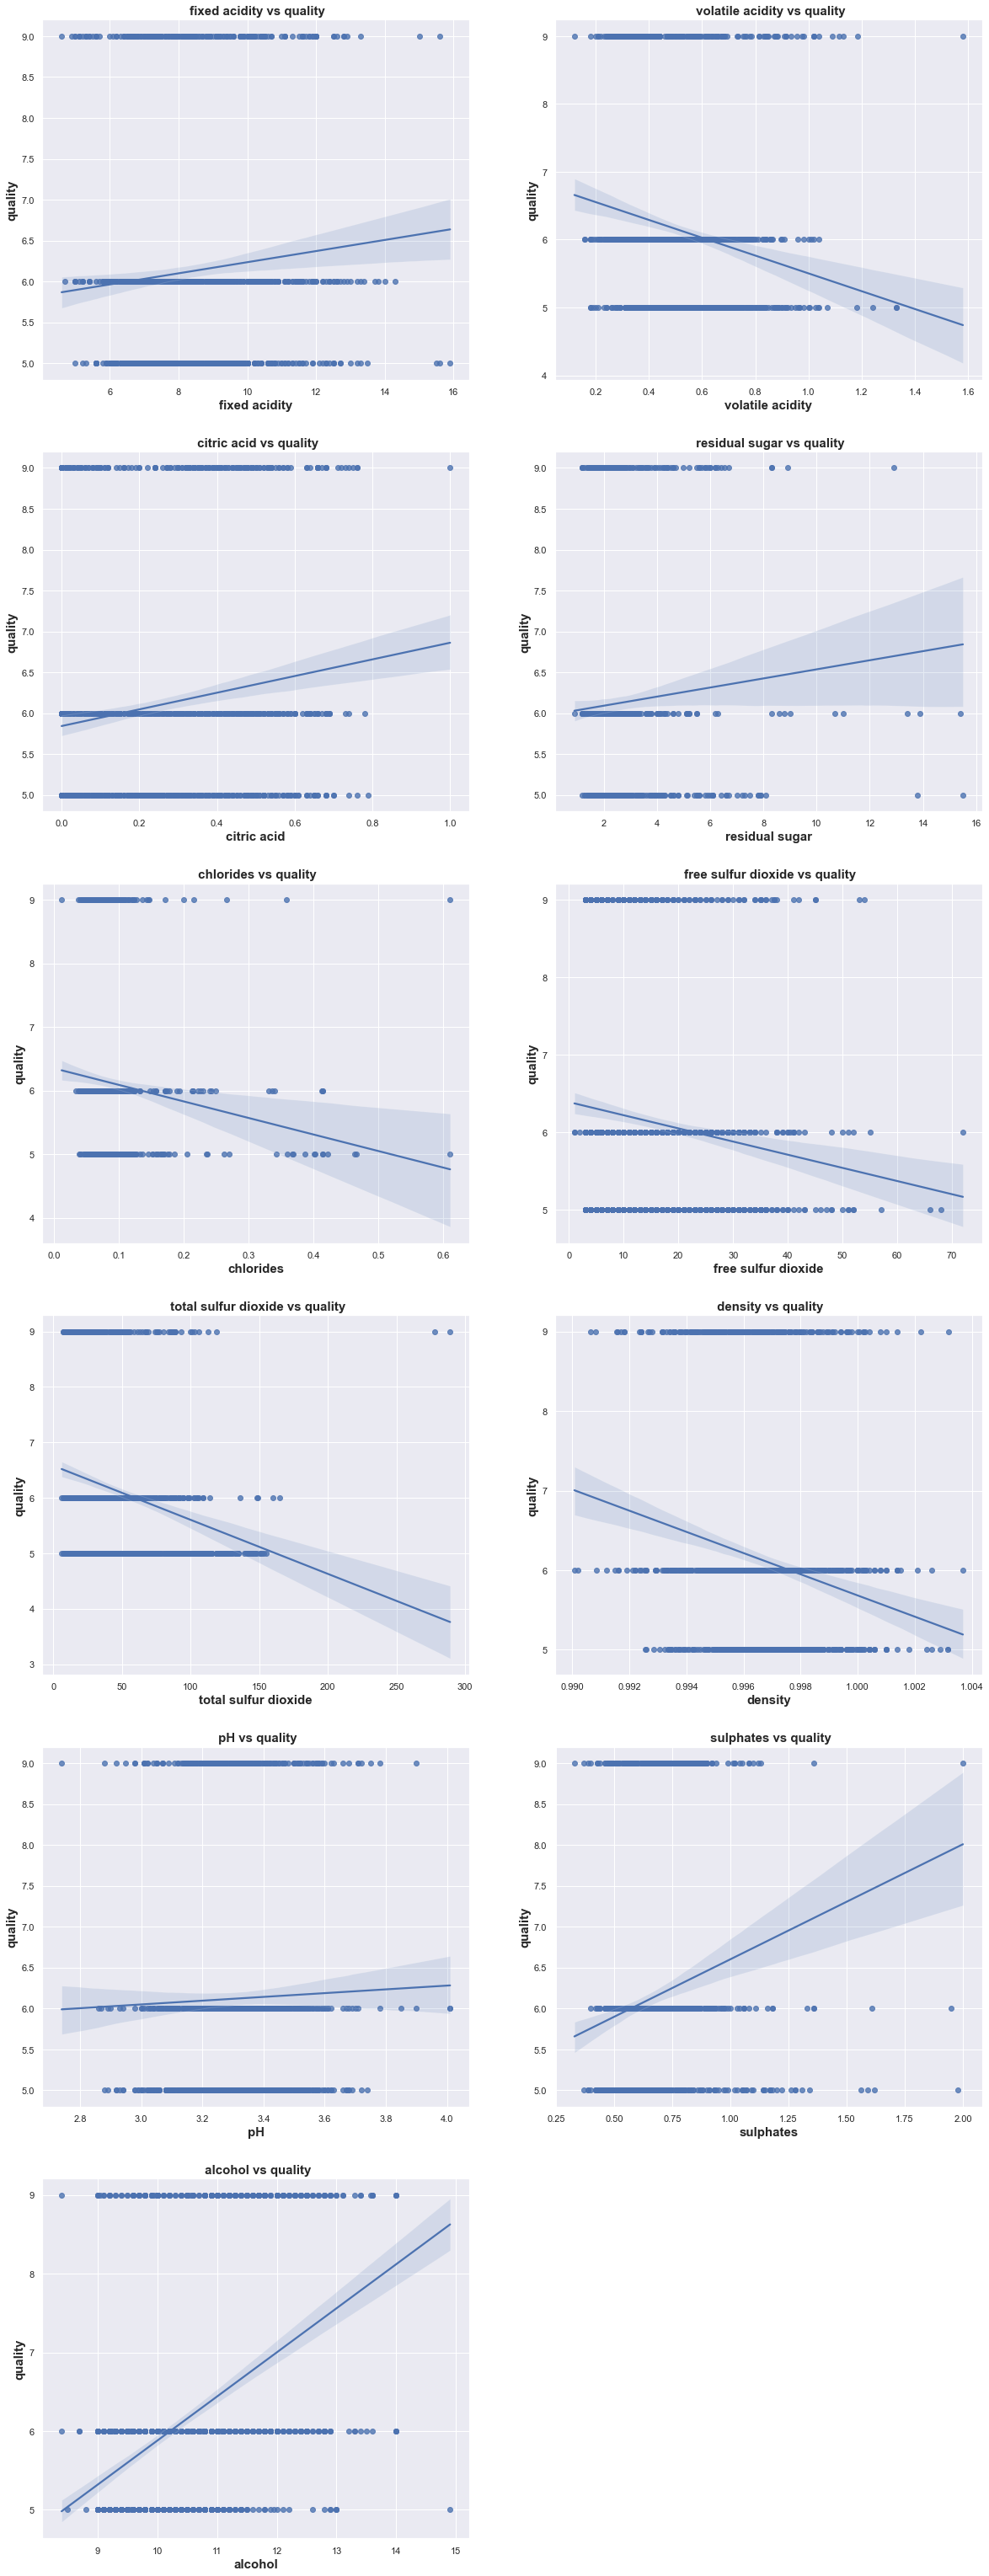

In [223]:
### plotting regplot for features vs modified quality
plt.figure(figsize=(20,55))
for feature in enumerate(Continuous_Features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={"figure.figsize":(8,9)})
    sns.regplot(data=data,y="quality",x=feature[1])
    plt.ylabel("quality",fontweight="bold",fontsize=15)
    plt.xlabel(feature[1],fontweight="bold",fontsize=15)
    plt.title(" {} vs quality".format(feature[1]),fontweight="bold",fontsize=15)
plt.show();

Mask function: The mask() method replaces the values of the rows where the condition evaluates to True.

In [226]:
### masking rare categories having values less than 20 percent as a new category 9

frequencies = data["quality"].value_counts(normalize=True)
mapping=data["quality"].map(frequencies)
data["quality"]=data["quality"].mask(mapping<0.20,9)

In [229]:
data["quality"].value_counts()

5    577
6    535
9    247
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

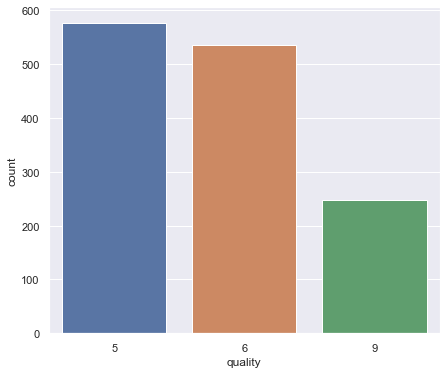

In [231]:
### visualising count of modified quality which is discrete feature
sns.set(rc={"figure.figsize":(7,6)})
sns.countplot(data=data,x= "quality")

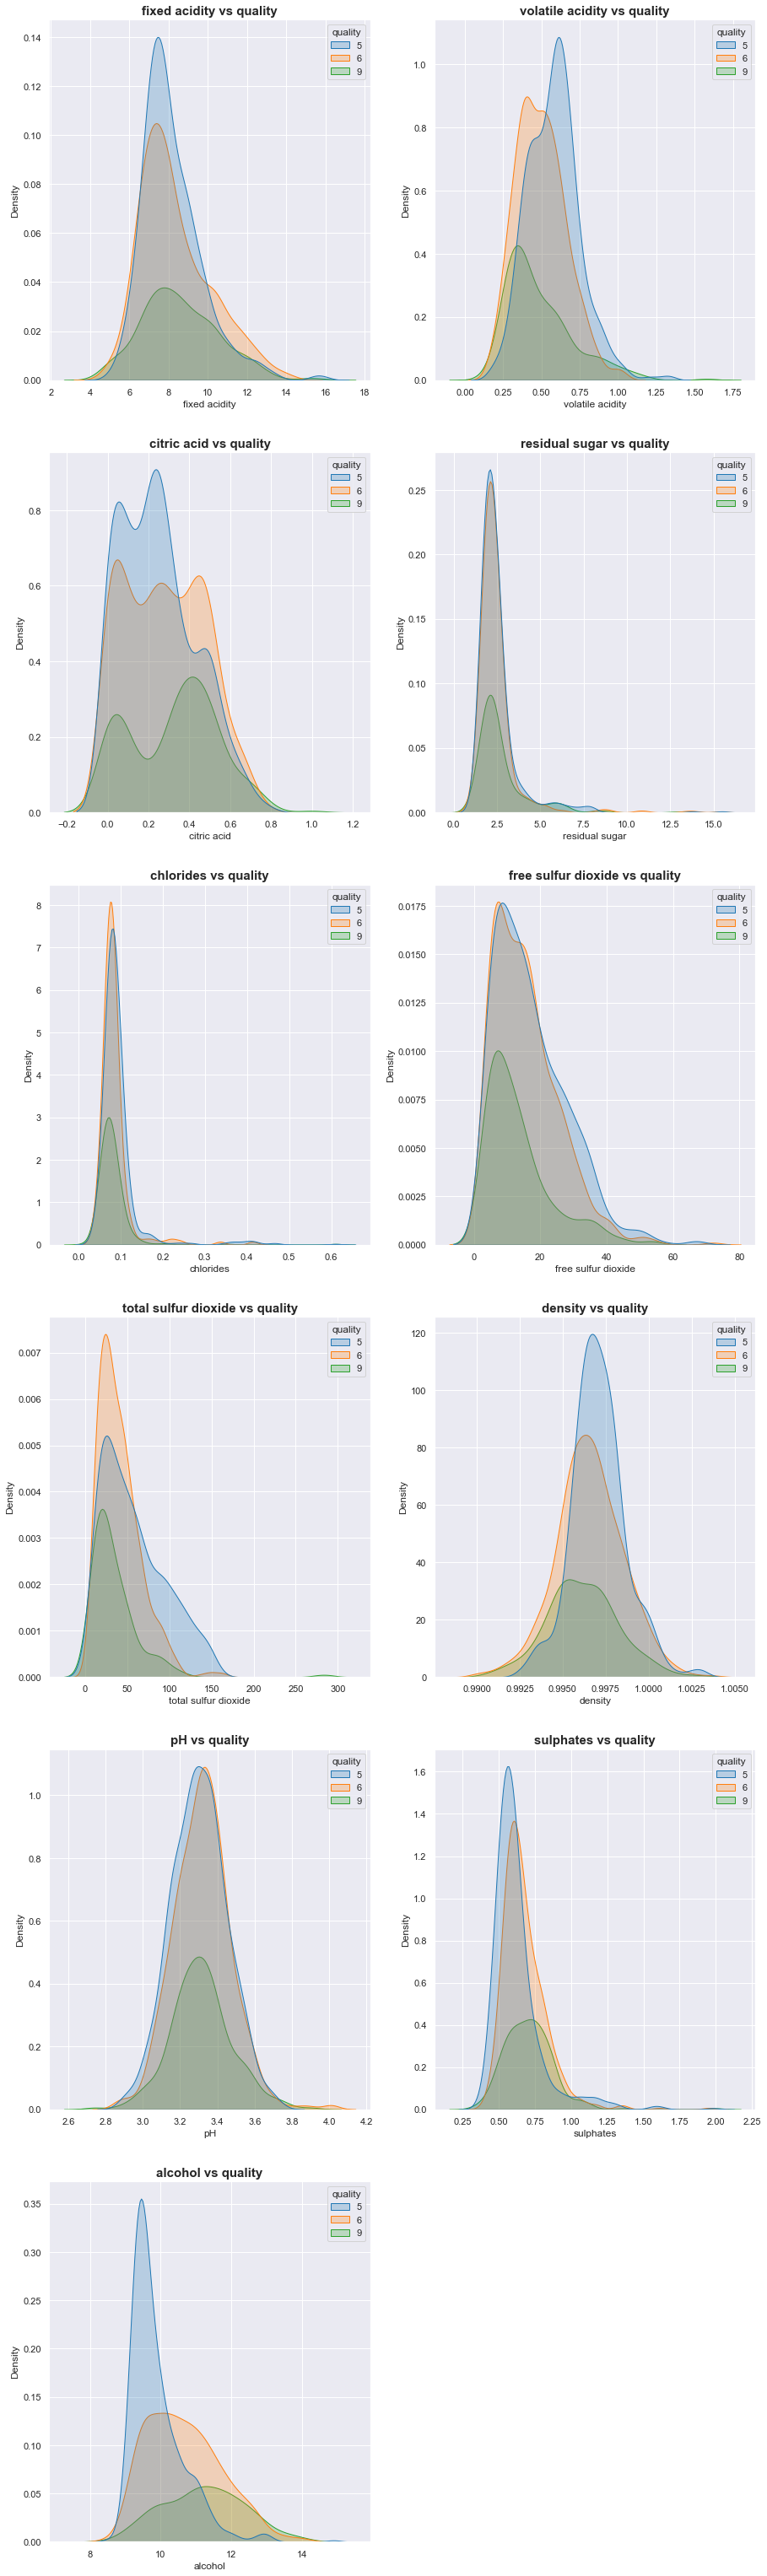

In [233]:
### Comparing Continuous numerical features with modified quality feature

palette1=sns.color_palette("tab10",3)
plt.figure(figsize=(15,55))
for feature in enumerate(Continuous_Features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={"figure.figsize":(8,7)})
    sns.kdeplot(data=data,x=feature[1],hue="quality", palette=palette1,fill=True)
    plt.title("{} vs quality" .format(feature[1]), fontsize=15,fontweight="bold")
plt.show();



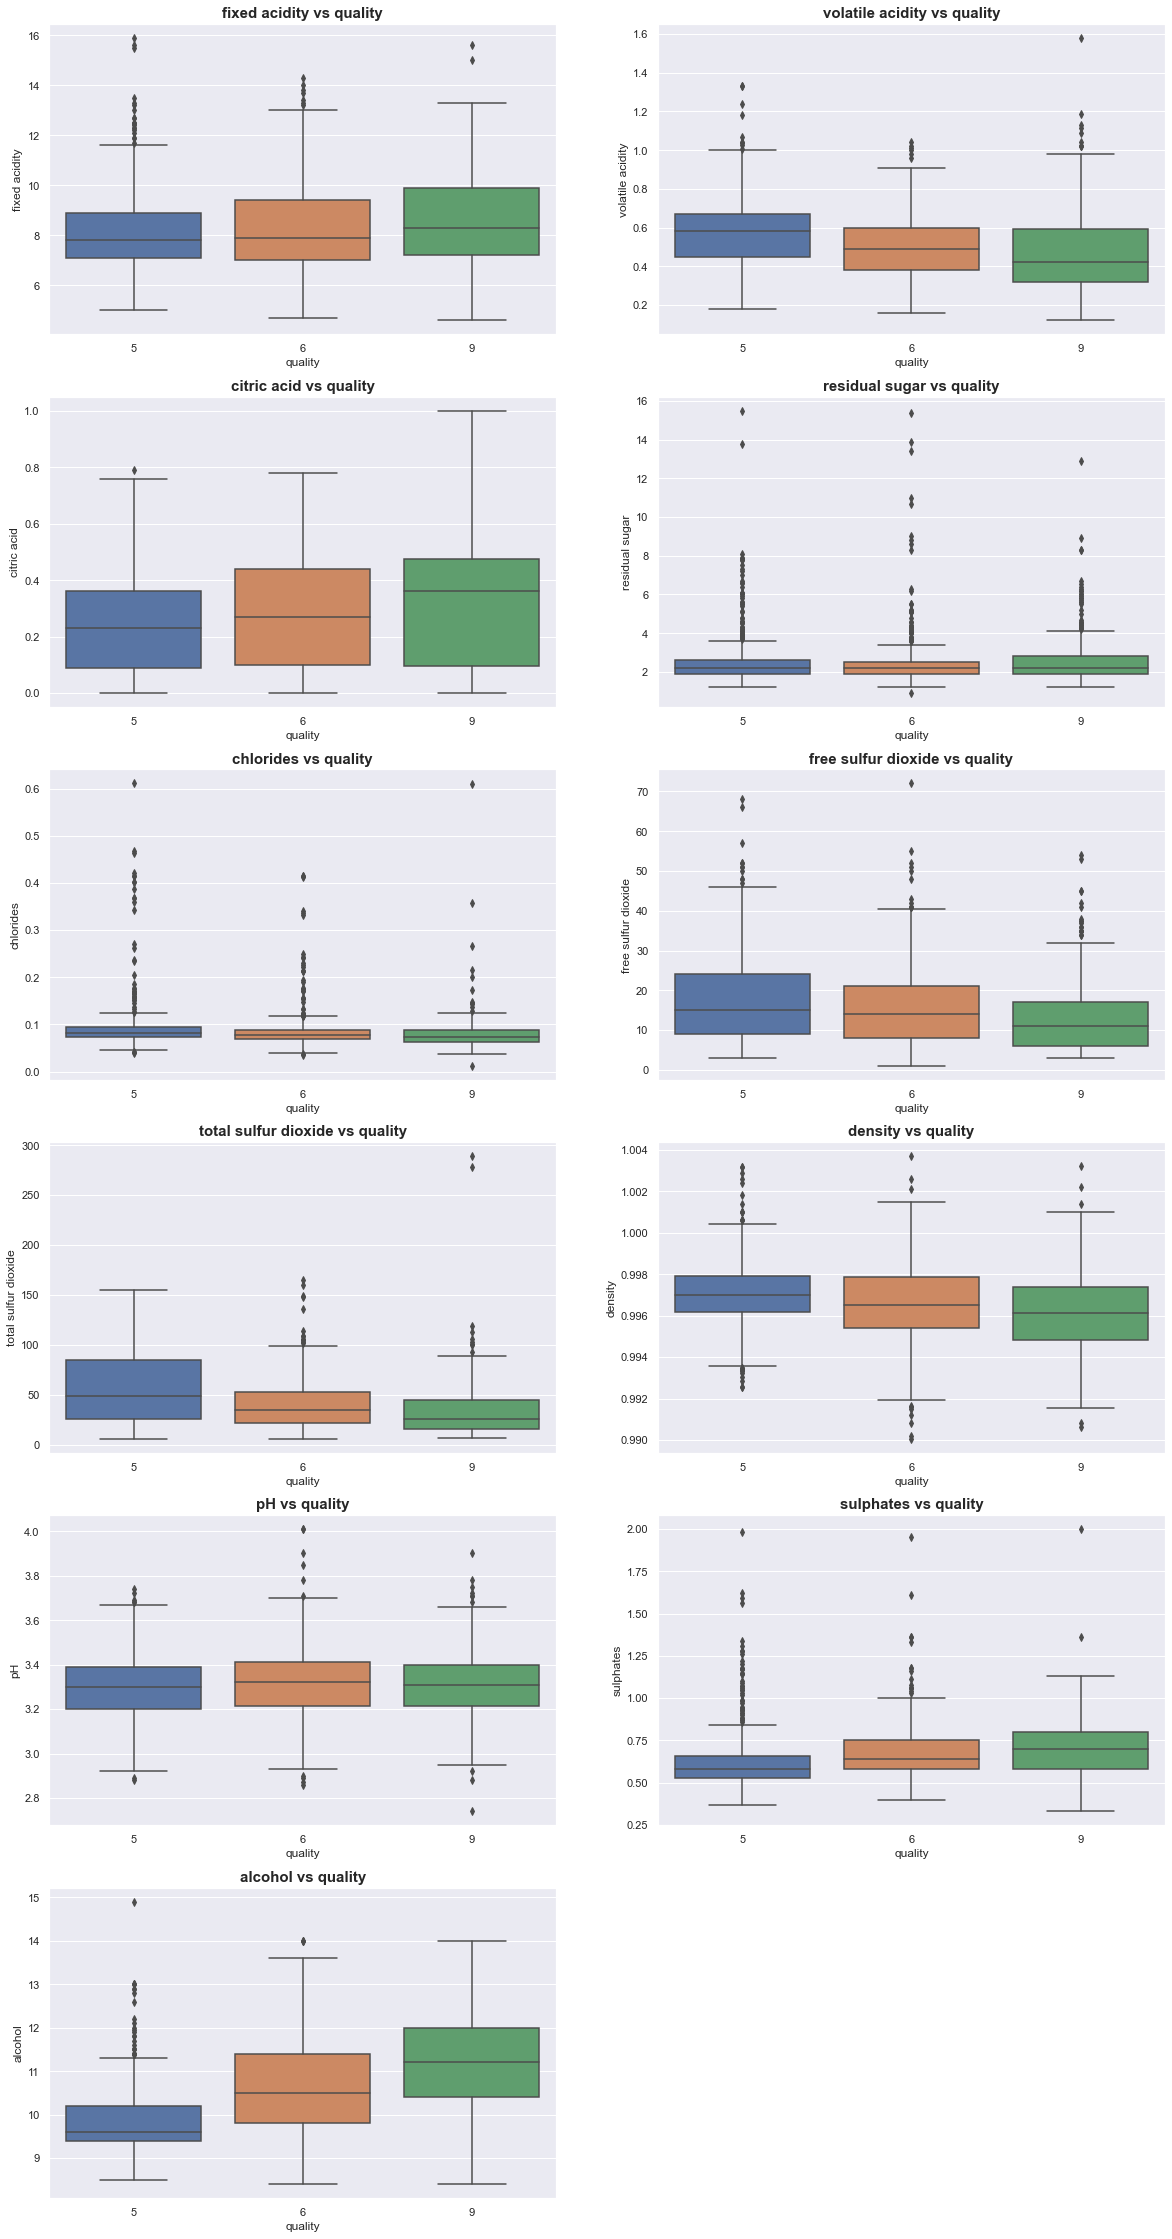

In [238]:
### getting outliers in features for each unique value in modified quality feature

plt.figure(figsize=(20,40))
for feature in enumerate(Continuous_Features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={"figure.figsize":(10,6)})
    sns.boxplot(data=data,y=feature[1],x= "quality")
    plt.title("{} vs quality".format(feature[1]),fontsize=15,fontweight="bold")
plt.show();

In [243]:
### getting correlation between independent and modified dependent features 
corr= round(data.corr(),2)
corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.26         0.67   
volatile acidity              -0.26              1.00        -0.55   
citric acid                    0.67             -0.55         1.00   
residual sugar                 0.11             -0.00         0.14   
chlorides                      0.09              0.06         0.21   
free sulfur dioxide           -0.14             -0.02        -0.05   
total sulfur dioxide          -0.10              0.07         0.05   
density                        0.67              0.02         0.36   
pH                            -0.69              0.25        -0.55   
sulphates                      0.19             -0.26         0.33   
alcohol                       -0.06             -0.20         0.11   
quality                        0.08             -0.17         0.14   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                   0.11       0.09                -0.14   
volatile acidity               -0.00       0.06                -0.02   
citric acid                     0.14       0.21                -0.05   
residual sugar                  1.00       0.03                 0.16   
chlorides                       0.03       1.00                 0.00   
free sulfur dioxide             0.16       0.00                 1.00   
total sulfur dioxide            0.20       0.05                 0.67   
density                         0.32       0.19                -0.02   
pH                             -0.08      -0.27                 0.06   
sulphates                      -0.01       0.39                 0.05   
alcohol                         0.06      -0.22                -0.08   
quality                         0.05      -0.09                -0.12   

                      total sulfur dioxide  density    pH  sulphates  alcohol  \
fixed acidity                        -0.10     0.67 -0.69       0.19    -0.06   
volatile acidity                      0.07     0.02  0.25      -0.26    -0.20   
citric acid                           0.05     0.36 -0.55       0.33     0.11   
residual sugar                        0.20     0.32 -0.08      -0.01     0.06   
chlorides                             0.05     0.19 -0.27       0.39    -0.22   
free sulfur dioxide                   0.67    -0.02  0.06       0.05    -0.08   
total sulfur dioxide                  1.00     0.08 -0.08       0.04    -0.22   
density                               0.08     1.00 -0.36       0.15    -0.50   
pH                                   -0.08    -0.36  1.00      -0.21     0.21   
sulphates                             0.04     0.15 -0.21       1.00     0.09   
alcohol                              -0.22    -0.50  0.21       0.09     1.00   
quality                              -0.23    -0.17  0.02       0.17     0.42   

                      quality  
fixed acidity            0.08  
volatile acidity        -0.17  
citric acid              0.14  
residual sugar           0.05  
chlorides               -0.09  
free sulfur dioxide     -0.12  
total sulfur dioxide    -0.23  
density                 -0.17  
pH                       0.02  
sulphates                0.17  
alcohol                  0.42  
quality                  1.00

<AxesSubplot:>

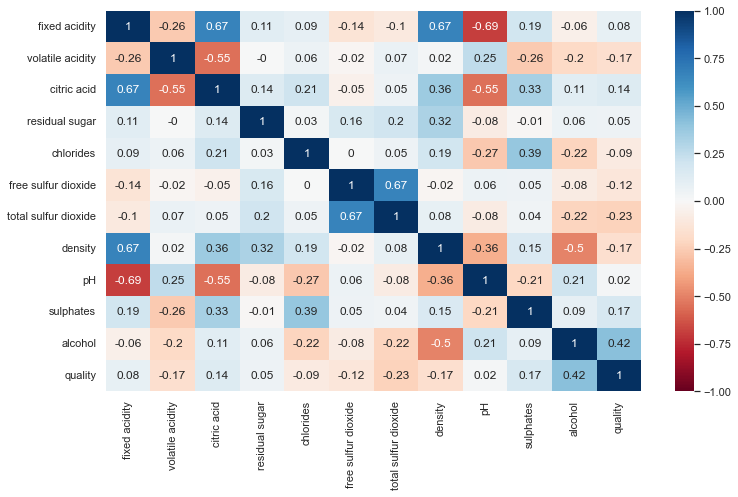

In [251]:
### Plotting heatmap for visualising the correlation between features

sns.set(rc={"figure.figsize":(12,7)})
sns.heatmap(data=corr,annot=True,cmap="RdBu",vmin=-1,vmax=1)

<AxesSubplot:>

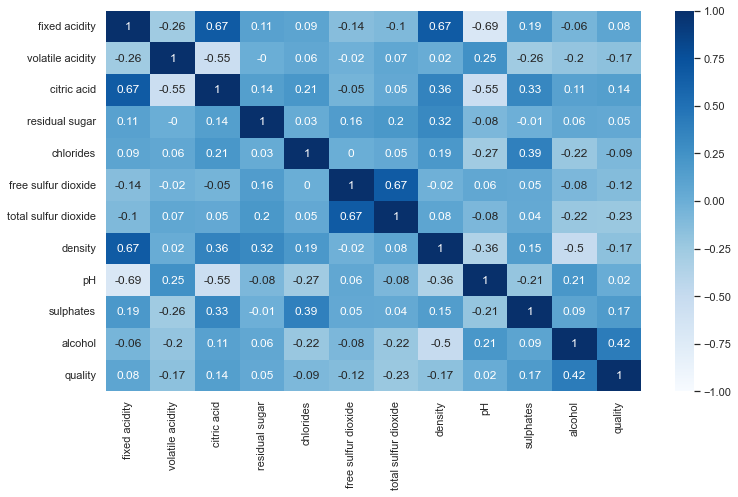

In [255]:
sns.set(rc={"figure.figsize":(12,7)})
sns.heatmap(data=corr,annot=True,cmap="Blues",vmin=-1,vmax=1)

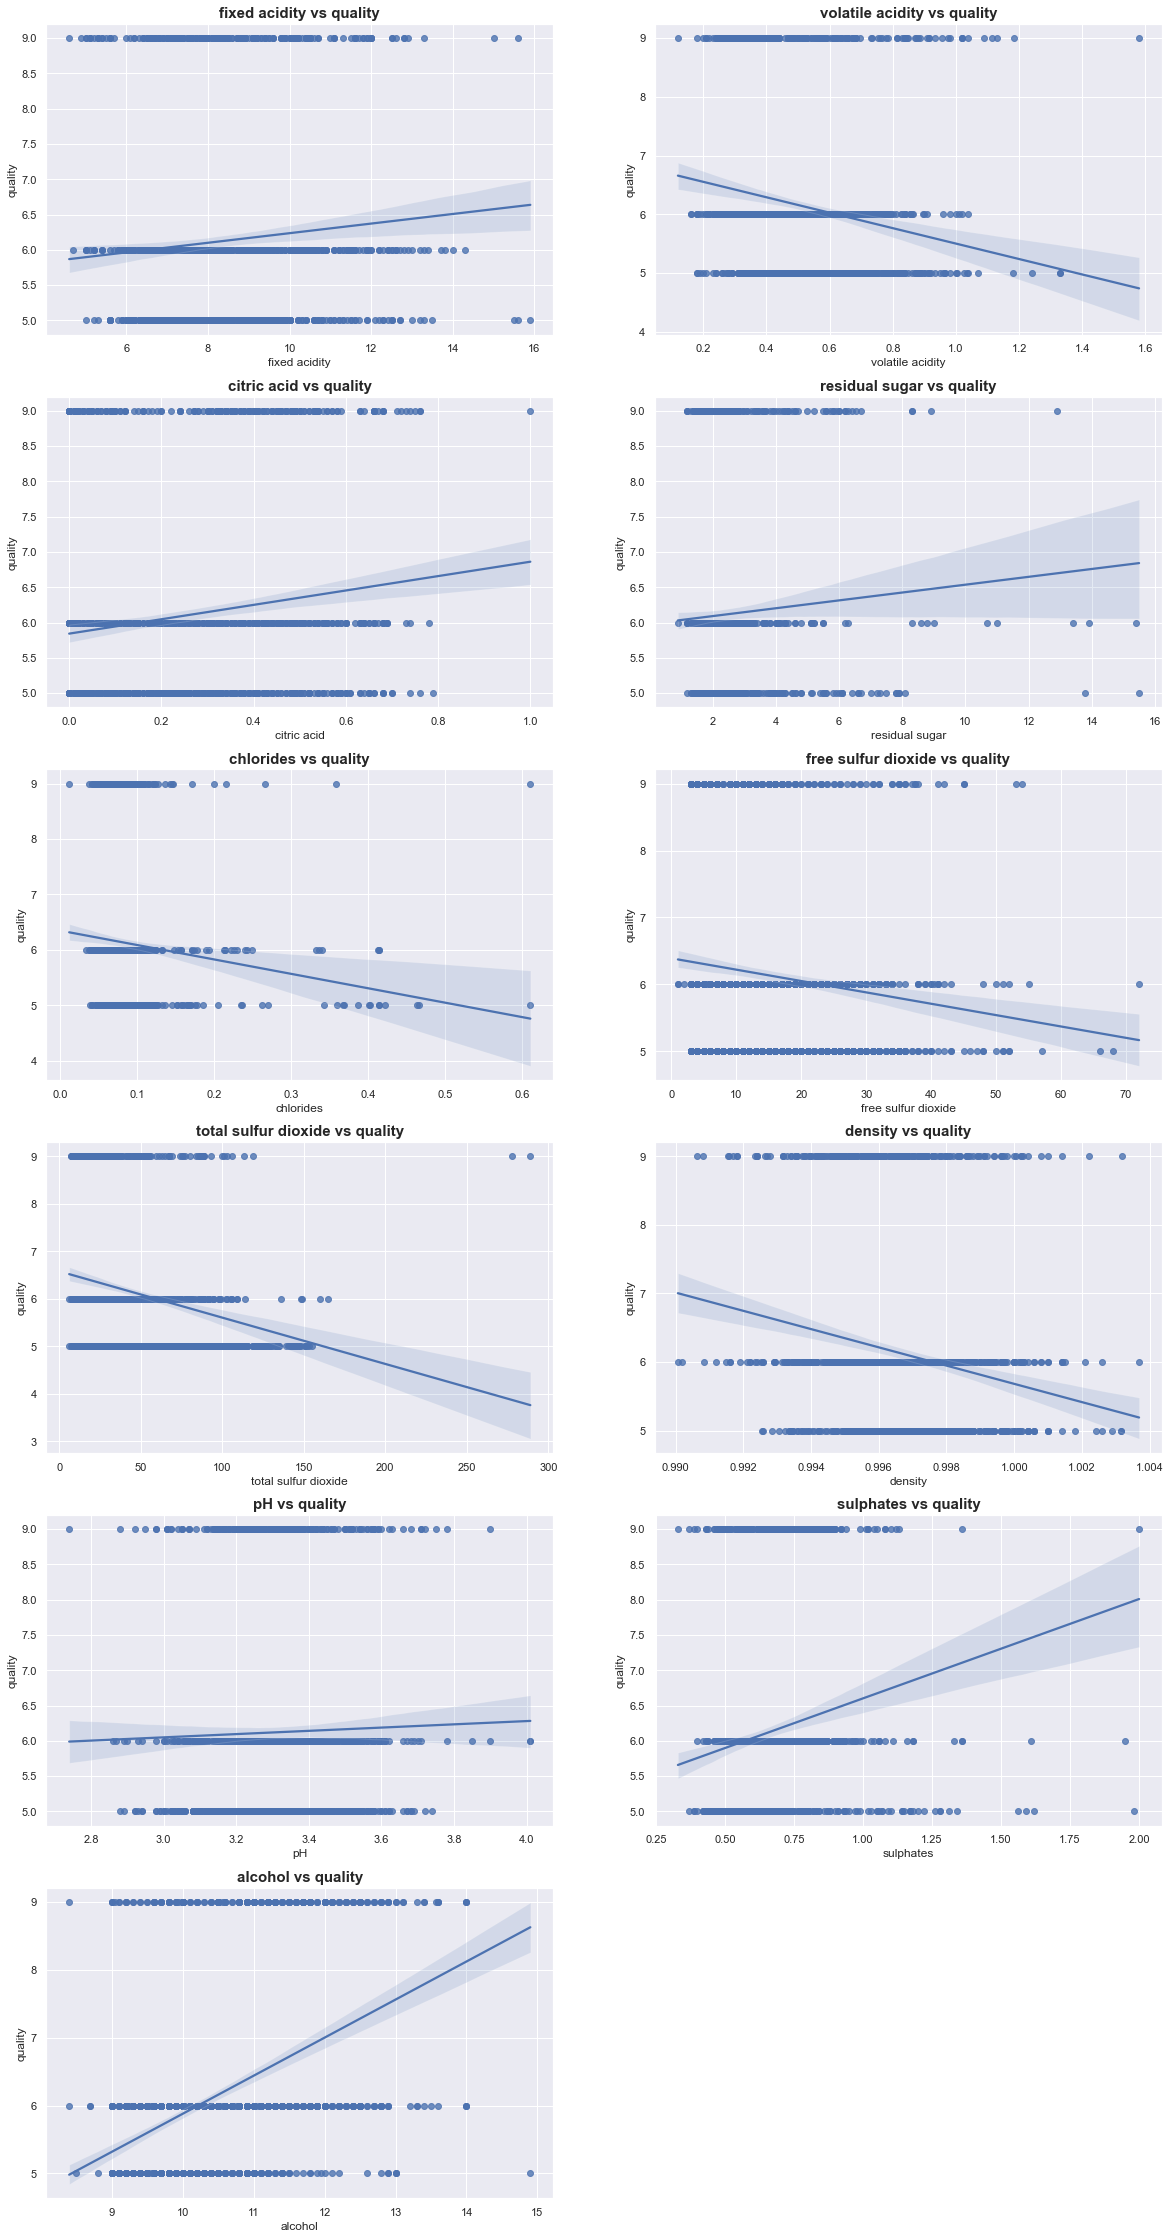

In [375]:
### plotting regplot for features vs modified quality
plt.figure(figsize=(20,40))
for feature in enumerate(Continuous_Features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={"figure.figsize":(8,7)})
    sns.regplot(data=data, y= "quality" , x=feature[1])
    plt.xlabel(feature[1])
    plt.ylabel("quality")
    plt.title("{} vs quality".format(feature[1]),fontsize=15,fontweight="bold")
plt.show();

In [264]:
### exporting dataset to csv
data.to_csv("winedataset.csv")

In [265]:
data.shape

(1359, 12)

In [266]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

In [269]:
data["quality"].value_counts()

5    577
6    535
9    247
Name: quality, dtype: int64

# <span style="color:green"> 4.0 Splitting data into independent and dependent features </span>

In [298]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [299]:
X.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  
0      9.4  
1      9.8  
2      9.8

In [300]:
y.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

In [319]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.25,random_state=10)

In [322]:
X_train.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
390            5.6              0.85         0.05             1.4      0.045   
654            8.6              0.47         0.47             2.4      0.074   
895            7.1              0.59         0.01             2.3      0.080   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
390                 12.0                  88.0   0.9924  3.56       0.82   
654                  7.0                  29.0   0.9979  3.08       0.46   
895                 27.0                  43.0   0.9955  3.42       0.58   

     alcohol  
390     12.9  
654      9.5  
895     10.7

In [323]:
X_test.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1008            8.9             0.350         0.40             3.6      0.110   
1163            9.0             0.785         0.24             1.7      0.078   
689             8.1             0.380         0.48             1.8      0.157   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1008                 12.0                  24.0  0.99549  3.23       0.70   
1163                 10.0                  21.0  0.99692  3.29       0.67   
689                   5.0                  17.0  0.99760  3.30       1.05   

      alcohol  
1008     12.0  
1163     10.0  
689       9.4

In [324]:
y_train.head(3)

390    9
654    5
895    6
Name: quality, dtype: int64

In [325]:
y_test.head(3)

1008    9
1163    5
689     5
Name: quality, dtype: int64

# <span style = "color:green"> 5.0 Feature Scaling for some models </span>

In [326]:
### Creating copy of test and training data for feature scaling

scalar=StandardScaler()
scalar

StandardScaler()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [327]:
X_train1 = scalar.fit_transform(X_train)
X_train1

array([[-1.55901763e+00,  1.76931216e+00, -1.15352302e+00, ...,
         1.58656678e+00,  1.04003958e+00,  2.22677443e+00],
       [ 1.33664887e-01, -3.07322897e-01,  9.81976515e-01, ...,
        -1.46311310e+00, -1.23393896e+00, -8.64908567e-01],
       [-7.12676372e-01,  3.48456596e-01, -1.35690393e+00, ...,
         6.97076813e-01, -4.75946114e-01,  2.26273669e-01],
       ...,
       [ 2.46510388e-01, -2.52674606e-01,  6.76905153e-01, ...,
        -1.80815989e-03, -7.91776467e-01,  4.44099629e-02],
       [-1.27690388e+00, -1.01775068e+00, -1.36618481e-01, ...,
         3.15866828e-01, -1.36027110e+00, -3.19317449e-01],
       [-9.94790125e-01,  9.49587798e-01, -1.00098734e+00, ...,
         8.24146808e-01, -4.75946114e-01, -2.28385596e-01]])

In [328]:
X_test1 =scalar.transform(X_test)
X_test1

array([[ 0.30293314, -0.96310239,  0.62605993, ..., -0.51008814,
         0.28204673,  1.40838776],
       [ 0.35935589,  1.41409827, -0.18746371, ..., -0.12887815,
         0.09254852, -0.4102493 ],
       [-0.14844887, -0.79915752,  1.03282174, ..., -0.06534316,
         2.4928592 , -0.95584042],
       ...,
       [-0.09202612, -0.08872973, -0.18746371, ...,  0.18879683,
        -0.09694969, -0.86490857],
       [-0.48698537, -0.19802631, -0.44168984, ...,  0.50647182,
        -0.7286104 , -0.68304486],
       [ 1.0364289 , -0.58056435,  1.49042879, ..., -1.71725309,
        -0.16011576, -0.77397671]])

# <span style="color:green"> 6.0 Model and Model Training and Model prediction </span>

# <span style="color:blue"> 6.1 Decision Tree Classifier </span>

In [330]:
dtc=DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [331]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [332]:
dtc_predict=dtc.predict(X_test)
dtc_predict

array([9, 5, 6, 5, 5, 5, 6, 6, 6, 9, 5, 5, 9, 5, 5, 5, 6, 9, 9, 6, 5, 6,
       9, 5, 9, 5, 5, 6, 5, 5, 9, 6, 6, 6, 5, 9, 6, 5, 9, 5, 5, 5, 6, 6,
       5, 9, 9, 6, 5, 6, 6, 5, 6, 6, 9, 6, 5, 9, 6, 9, 6, 6, 9, 5, 6, 5,
       5, 9, 5, 5, 5, 6, 6, 6, 5, 9, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 9,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 9, 9, 6, 5, 6, 9, 6, 6, 9,
       5, 5, 6, 5, 5, 9, 6, 9, 5, 6, 9, 9, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6,
       5, 5, 9, 9, 5, 5, 6, 6, 6, 5, 9, 6, 5, 5, 5, 6, 5, 6, 5, 9, 6, 6,
       9, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 9, 5, 5, 6, 5, 5, 9, 6, 9,
       6, 6, 9, 5, 5, 6, 6, 5, 5, 9, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5,
       9, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 9, 6, 6, 9, 9, 5, 5, 5, 5, 9, 6,
       6, 6, 5, 5, 5, 6, 6, 6, 6, 9, 5, 5, 6, 9, 6, 6, 5, 6, 5, 9, 5, 5,
       9, 5, 9, 6, 5, 6, 5, 9, 6, 5, 6, 6, 5, 6, 6, 9, 6, 9, 5, 9, 6, 6,
       6, 6, 6, 9, 5, 6, 6, 5, 9, 5, 6, 6, 9, 9, 6, 6, 5, 9, 6, 6, 5, 9,
       5, 6, 5, 9, 5, 5, 6, 9, 6, 5, 5, 6, 9, 6, 6,

In [333]:
print(classification_report(y_test,dtc_predict))

              precision    recall  f1-score   support

           5       0.57      0.54      0.56       145
           6       0.46      0.49      0.47       129
           9       0.43      0.42      0.43        66

    accuracy                           0.50       340
   macro avg       0.49      0.49      0.49       340
weighted avg       0.50      0.50      0.50       340



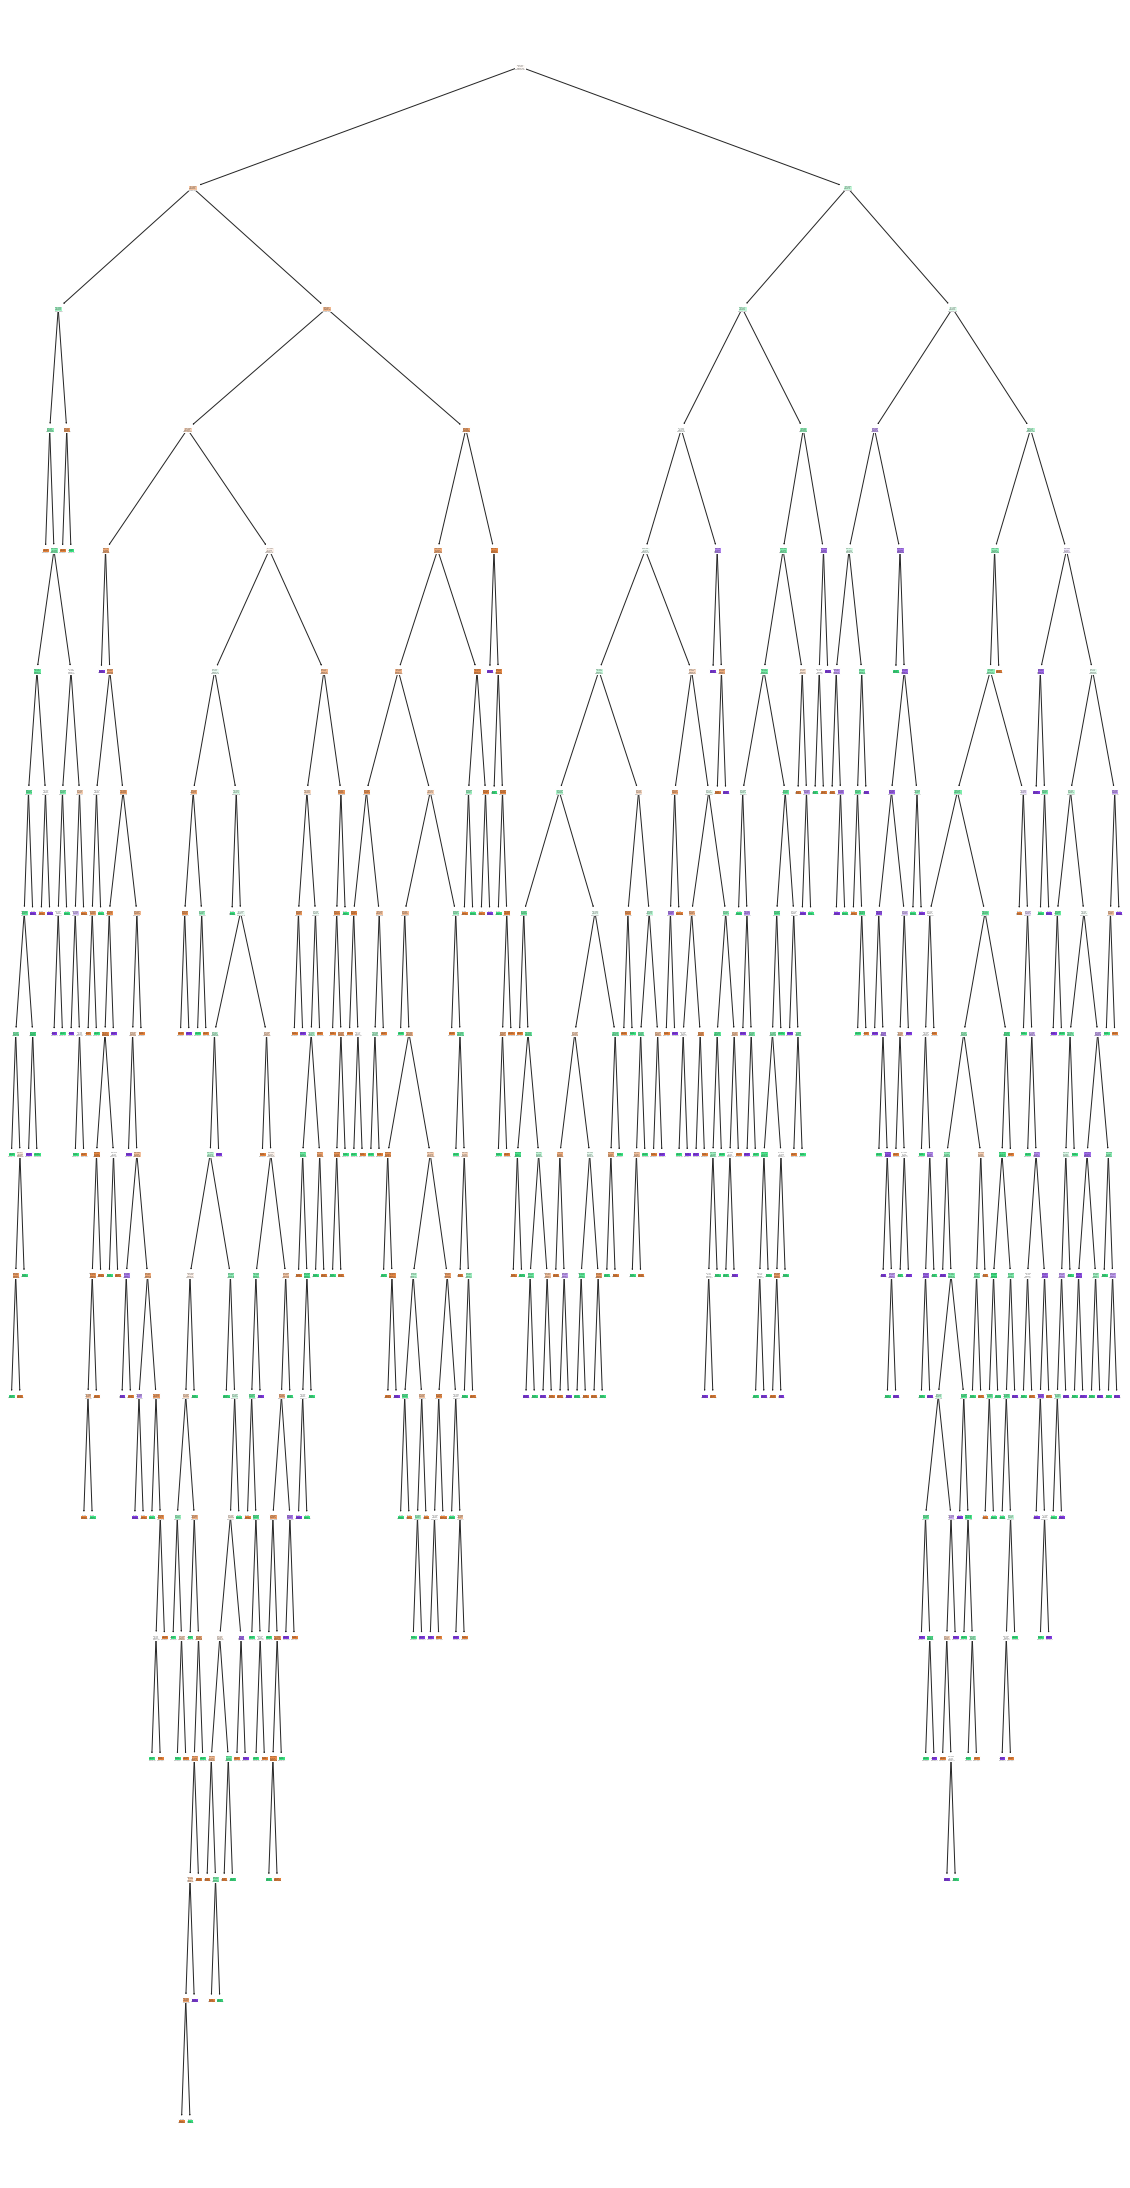

In [336]:
### Visualising the Decision Tree

from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,40))
clf= dtc.fit(X_train,y_train)
tree.plot_tree(clf,filled=True)
plt.show();

In [337]:
fig.savefig("decision tree.png")

# <span style="color:blue"> 6.2 Logistic Regression </span>

In [338]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [339]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [340]:
log_reg_predict=log_reg.predict(X_test)
log_reg_predict

array([6, 5, 6, 5, 5, 5, 5, 6, 6, 9, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5,
       6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 9, 5, 6, 5, 6, 6, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6,
       6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       9, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 9, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 5, 9, 5, 5, 6, 5, 6, 6, 6, 6, 6, 9, 6, 9, 6, 6, 6, 6,
       5, 6, 6, 9, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 5, 6, 6, 5, 6, 5, 9,
       5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6,

In [341]:
print(classification_report(y_test,log_reg_predict))

              precision    recall  f1-score   support

           5       0.64      0.71      0.67       145
           6       0.49      0.64      0.55       129
           9       0.58      0.11      0.18        66

    accuracy                           0.56       340
   macro avg       0.57      0.48      0.47       340
weighted avg       0.57      0.56      0.53       340



In [363]:
score=log_reg.score(X_test,y_test)
score

0.5647058823529412

In [371]:
from sklearn import metrics

In [372]:
cm=metrics.confusion_matrix(y_test,log_reg_predict)
print(cm)

[[103  42   0]
 [ 42  82   5]
 [ 16  43   7]]


# <span style="color:blue"> 6.3 Support Vector Classifier </span>

In [385]:
svm=SVC()
svm

SVC()

In [386]:
svm.fit(X_train,y_train)

SVC()

In [388]:
svm_predict=svm.predict(X_test)
svm_predict

array([6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6,
       5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6,
       6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6,

In [389]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           5       0.67      0.42      0.52       145
           6       0.42      0.81      0.55       129
           9       0.00      0.00      0.00        66

    accuracy                           0.49       340
   macro avg       0.36      0.41      0.36       340
weighted avg       0.44      0.49      0.43       340



# <span style="color:blue"> 6.4 Random Forest Classifier </span>

In [398]:
Rand_cla=RandomForestClassifier()
Rand_cla

RandomForestClassifier()

In [399]:
Rand_cla.fit(X_train,y_train)

RandomForestClassifier()

In [400]:
Rand_cla_predict=Rand_cla.predict(X_test)
Rand_cla_predict

array([6, 6, 6, 5, 5, 5, 6, 6, 6, 9, 5, 5, 6, 5, 5, 6, 5, 5, 9, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 5, 9, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 9, 5, 6, 5, 6, 9, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 9,
       5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 9, 5, 6, 9, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 9, 5, 5, 5, 5, 9, 6, 6, 9, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6,
       6, 6, 9, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 9, 5,
       6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 9, 6, 6, 6, 6, 9, 5, 5, 5, 5, 6, 6,
       5, 6, 5, 5, 5, 6, 9, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 9, 5, 5,
       5, 5, 9, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 9, 6, 9, 6, 9, 6, 6, 5, 5,
       6, 6, 6, 9, 5, 6, 6, 6, 9, 6, 6, 6, 9, 6, 9, 5, 6, 9, 6, 6, 5, 6,
       5, 6, 5, 6, 5, 5, 5, 9, 6, 6, 5, 6, 9, 5, 6,

In [401]:
print(classification_report(y_test,Rand_cla_predict))

              precision    recall  f1-score   support

           5       0.64      0.72      0.68       145
           6       0.52      0.59      0.55       129
           9       0.52      0.24      0.33        66

    accuracy                           0.58       340
   macro avg       0.56      0.52      0.52       340
weighted avg       0.57      0.58      0.56       340



# <span style="color:red"> Acurracy score </span>

In [419]:
print("DecisionTreeClassifier score is" ,dtc.score(X_test,y_test))
print("log_reg score is" ,log_reg.score(X_test,y_test))
print("svm score is" ,svm.score(X_test,y_test))
print("Rand_cla score is" ,Rand_cla.score(X_test,y_test))

DecisionTreeClassifier score is 0.5088235294117647
log_reg score is 0.5647058823529412
svm score is 0.4852941176470588
Rand_cla score is 0.5764705882352941


# <span style="color:red"> Confusion matrix </span>

In [431]:
print("DecisionTreeClassifier confusion matrix is:")
print(metrics.confusion_matrix(y_test,dtc_predict))
print("\nlog_reg score is:") 
print(metrics.confusion_matrix(y_test,log_reg_predict))
print("\nsvm score is:") 
print(metrics.confusion_matrix(y_test,svm_predict))
print("\nRand_cla score is:") 
print(metrics.confusion_matrix(y_test,Rand_cla_predict))

DecisionTreeClassifier confusion matrix is:
[[79 51 15]
 [44 63 22]
 [15 23 28]]

log_reg score is:
[[103  42   0]
 [ 42  82   5]
 [ 16  43   7]]

svm score is:
[[ 61  84   0]
 [ 25 104   0]
 [  5  61   0]]

Rand_cla score is:
[[104  38   3]
 [ 41  76  12]
 [ 18  32  16]]
